# Unsupervised Capstone Project

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import string
import time
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import gensim

from gensim.models import word2vec, doc2vec
from nltk.corpus import gutenberg, stopwords
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import normalize, Normalizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import BernoulliRBM


#nltk.download('punkt')
#nltk.download('gutenberg')

import warnings
warnings.filterwarnings('ignore')

c:\users\corey\appdata\local\programs\python\python37\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#nltk.download()

In [3]:
from nltk.corpus import brown, shakespeare, comparative_sentences

In [4]:
brown.fileids()
ca01 = brown.raw('ca01')
#print(ca01)
shakespeare.fileids()
ac = shakespeare.raw('a_and_c.xml')
#print(ac)

In [5]:
comparative_sentences.fileids()

['labeledSentences.txt']

In [6]:
#print(comparative_sentences.raw('labeledSentences.txt'))

In [7]:
from nltk.corpus import inaugural
#inaugural.fileids()

In [8]:
# select 10 presidential inaugural speeches for corpus
speeches = ['1789-Washington.txt', 
            '1865-Lincoln.txt',
            '1905-Roosevelt.txt',
            '1929-Hoover.txt',
            '1945-Roosevelt.txt',
            '1949-Truman.txt',
            '1953-Eisenhower.txt',
            '1961-Kennedy.txt',
            '2001-Bush.txt',
            '2009-Obama.txt']

# Import 100 greatest movies and synopsis from IMDB

In [9]:
from requests import get
from bs4 import BeautifulSoup

# get URL for IMDB top 100 movies
url = 'https://www.imdb.com/list/ls055592025/?sort=list_order,asc&st_dt=&mode=simple&page=1&ref_=ttls_vw_smp'

# Request the webpage content
response = get(url)

# Parse the HTML page with BeautifulSoup parser
html_soup = BeautifulSoup(response.text, 'html.parser')

# After inspecting the source code the title lives in the lister-item-header class
movie_containers = html_soup.find_all('span', class_='lister-item-header')

# Check to make sure we have the right number of movie sets which contain the title
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
100


In [10]:
# The movie title is tied to an <a> anchor - we can extract the anchor text with a.text
print(movie_containers[0].a.text)
print(movie_containers[0].a['href'][:-16])

The Godfather
/title/tt0068646/


In [11]:
# Empty list for storing our titles
titles = []

# Empty list for storing link for synopsis
link = []

# Get titles and links for synopsis
for i in range (100):
    titles.append(movie_containers[i].a.text)
    link.append(movie_containers[i].a['href'][:-16])
print(len(titles))
print(len(link))

100
100


In [12]:
synopsis = []
for i in link:
    print("https://www.imdb.com"+str(i)+"plotsummary?ref_=tt_ql_stry_3#synopsis")
    request = get("https://www.imdb.com"+str(i)+"plotsummary?ref_=tt_ql_stry_3#synopsis")
    soup = BeautifulSoup(request.text, "html.parser")
    
    for x in soup.find_all(id='plot-synopsis-content'):
        print(x.text)
        synopsis.append(x.text)

https://www.imdb.com/title/tt0068646/plotsummary?ref_=tt_ql_stry_3#synopsis

In late summer 1945, guests are gathered for the wedding reception of Don Vito Corleone's daughter Connie (Talia Shire) and Carlo Rizzi (Gianni Russo). Vito (Marlon Brando), the head of the Corleone Mafia family, is known to friends and associates as "Godfather." He and Tom Hagen (Robert Duvall), the Corleone family lawyer, are hearing requests for favors because, according to Italian tradition, "no Sicilian can refuse a request on his daughter's wedding day." One of the men who asks the Don for a favor is Amerigo Bonasera, a successful mortician and acquaintance of the Don, whose daughter was brutally beaten by two young men because she refused their advances; the men received minimal punishment from the presiding judge. The Don is disappointed in Bonasera, who'd avoided most contact with the Don due to Corleone's nefarious business dealings. The Don's wife is godmother to Bonasera's shamed daughter, a relati


https://www.imdb.com/title/tt0111161/plotsummary?ref_=tt_ql_stry_3#synopsis

In 1947, Andy Dufresne (Tim Robbins), a banker in Maine, is convicted of murdering his wife and her lover, a golf pro. Since the state of Maine has no death penalty, he is given two consecutive life sentences and sent to the notoriously harsh Shawshank Prison. Andy keeps claiming his innocence, but his cold and measured demeanor led many to doubt his words.Meanwhile, Ellis Boyd Redding (Morgan Freeman), known as Red is being interrogated by the parole commission to consider granting him parole after having spent 20 years at Shawshank for murder. Despite his best efforts and behavior, Red's parole is rejected which doesn't affect him all that much. Red is then introduced as the local smuggler who can get inmates anything they want within reason. An alarm then goes off alerting all prisoners of new arrivals. Red and his friends bet on whichever new fish will have a nervous break down during his first night in p


https://www.imdb.com/title/tt0108052/plotsummary?ref_=tt_ql_stry_3#synopsis

The relocation of Polish Jews from surrounding areas to Krakow begins in late 1939, shortly after the outbreak of World War II, when the German Army defeats the Polish Army in three weeks. Oskar Schindler (Liam Neeson), a successful businessman, arrives from Czechoslovakia in hopes of using the abundant cheap labour force of Jews to manufacture enamelware for the German military. Schindler, an opportunistic member of the Nazi party, lavishes bribes upon the army and SS officials in charge of procurement. Sponsored by the military, Schindler acquires a factory for the production of army mess kits and cooking paraphernalia. Not knowing much about how to properly run such an enterprise, he gains a contact in Itzhak Stern (Ben Kingsley), a functionary in the local Judenrat (Jewish Council) who has contacts with the now-underground Jewish business community in the ghetto. They loan him the money for the factory in


https://www.imdb.com/title/tt0034583/plotsummary?ref_=tt_ql_stry_3#synopsis

In the early years of World War II, December 1941, the Moroccan coastal city of Casablanca attracts people from all over the world, particularly Nazi-occupied Europe. Many are transients trying to get out of Europe; a few are just trying to make a buck. Most of them -- gamblers and refugees, Nazis, resistance fighters, and plain old crooks -- find their way to Rick's Café Américain, a swank nightclub owned by American expatriate Rick Blaine (Humphrey Bogart). Though we learn later that Rick once harbored enough idealism to put himself at risk to fight fascism, he's now embittered and cynical, professing to be neutral and detached: "I stick my neck out for nobody."Ugarte (Peter Lorre) comes to Rick's with letters of transit he obtained by killing two German couriers. The papers allow the bearer to travel freely around German-controlled Europe, including to neutral Lisbon, Portugal; from Lisbon, it's relatively


https://www.imdb.com/title/tt0031381/plotsummary?ref_=tt_ql_stry_3#synopsis

The film opens in Tara, a cotton plantation owned by the proud Gerald O'Hara (Thomas Mitchell), a self-made man of Irish descent, in the Confederate state of Georgia near Atlanta. The date is April 1861. He and his wife, Ellen (Barbara O'Neil), have three beautiful daughters; Suellen (Evelyn Keyes), Carreen (Ann Rutherford), and the headstrong 16-year-old Scarlett (Vivien Leigh). Scarlett spends her days having fun, tormenting the household servants, and flirting, especially with twins Brent and Stuart Tarleton (Fred Crane, George Reeves). The brothers anticipate the next ball and hope Scarlett will choose one of them to attend the ball. The Tarletons speculate the impending war between the North and the South due to the recent attack on Fort Sumter. Scarlett finds the latter topic boring and is certain that there will be no war. She runs off to meet her father who is riding home through the fields. He return


https://www.imdb.com/title/tt0032138/plotsummary?ref_=tt_ql_stry_3#synopsis

Dorothy Gale (Judy Garland) is an orphaned teenager who lives with her Auntie Em (Clara Blandick) and Uncle Henry (Charley Grapewin) on a Kansas farm in the early 1900s. She daydreams about going "over the rainbow" after Miss Gulch (Margaret Hamilton), a nasty neighbor, hits Dorothy's dog Toto (Terry) on the back with a rake, causing Toto to bite her. Miss Gulch shows up with an order to take Toto to the sheriff to be euthanized, but Toto jumps out of the basket on the back of Miss Gulch's bicycle and runs back to Dorothy. Fearing that Miss Gulch, who does not know that Toto has escaped, will return, Dorothy takes the dog and runs away from home. She meets an itinerant phony fortune teller, Professor Marvel (Frank Morgan), who immediately guesses that Dorothy has run away. Pretending to tell her fortune and wishing to reunite Dorothy with her aunt, he tells her that Auntie Em has fallen ill from worry over he


https://www.imdb.com/title/tt0056172/plotsummary?ref_=tt_ql_stry_3#synopsis

In 1935, T. E. Lawrence (Peter O'Toole) is killed in a motorcycle accident. At his memorial service at St Paul's Cathedral, a reporter tries to gain insights into this remarkable, enigmatic man from those who knew him, with little success.During the First World War, Lawrence is a misfit British Army lieutenant stationed in Cairo, notable for his insolence and knowledge. Over the objections of General Murray (Donald Wolfit), he is sent by Mr. Dryden (Claude Rains) of the Arab Bureau to assess the prospects of Prince Faisal (Alec Guinness) in his revolt against the Turks.On the journey, his Bedouin guide is killed by Sherif Ali (Omar Sharif) for drinking from a well without permission. Lawrence later meets Colonel Brighton (Anthony Quayle), who orders him to keep quiet, make his assessment of Faisal's camp, and leave. Lawrence promptly ignores Brighton's commands when he meets Faisal. His knowledge and outspoke


https://www.imdb.com/title/tt0054215/plotsummary?ref_=tt_ql_stry_3#synopsis

In a Phoenix hotel room on a Friday afternoon, Marion Crane (Janet Leigh) and her out-of-town lover Sam Loomis (John Gavin) end a stolen lunchtime interlude with yet another disagreement about their future. Marion wants to marry Sam, but debts inherited from his father and his own alimony payments do not leave him enough money to support her as he would like. As they have done so often before on Sam's business trips to Phoenix, they part leaving their future uncertain.Marion returns to the real estate office where she works as a secretary, arriving just ahead of her boss Mr. Lowery (Vaughn Taylor) and his client Cassidy (Frank Albertson) who buys a house from Lowery with $40,000 in cash. Lowery tells Marion to put the money in the safe deposit box at the bank until Monday. Pleading a headache, Marion asks to take the rest of the day off after her errand to the bank.But Marion doesn't go to the bank. On the sp


https://www.imdb.com/title/tt0071562/plotsummary?ref_=tt_ql_stry_3#synopsis

The Godfather Part II presents two parallel storylines. One involves Mafia chief Michael Corleone in 1958/1959 after the events of the first movie; the other is a series of flashbacks following his father, Vito Corleone from 1917 to 1925, from his youth in Sicily (1901) to the founding of the Corleone family in New York.The film begins in 1901, in the town of Corleone, Sicily, at the funeral of young Vito's father, Antonio Andolini, who has been murdered for an insult to the local Mafia lord, Don Ciccio. During the procession, Vito's older brother is murdered because he swore revenge on the Don. Vito's mother goes to Ciccio to beg for mercy, but he refuses, knowing that nine-year-old Vito will seek revenge later in life. The mother takes Ciccio hostage at knifepoint, allowing her son to escape, and Ciccio's men kill her. They search the town for the boy, but he is aided in his escape by the townspeople. Vito 


https://www.imdb.com/title/tt0047296/plotsummary?ref_=tt_ql_stry_3#synopsis

Terry Malloy (Marlon Brando) once dreamed of being a great prize fighter, but now works at the docks of Johnny Friendly (Lee J. Cobb) , the corrupt boss of the dockers union. He witnesses a murder by a couple of Johnny's thugs, but won't betray Friendly, who is both his brother's (Rod Steiger) boss and a long-time friend of his family.What he sees at the docks repulses Terry. In an economically depressed environment in which many are out of work, more gather by the docks each morning hoping to secure work for that day than can be hired, placing Johnny Friendly and his forces in a position to exploit them. Those who complain of the working conditions or wages one day don't work the next day, or are placed in harm's way. Consequently, most tolerate being abused.After befriending both the sister (Eva Marie Saint) of the murdered man and the local priest (Karle Malden), Terry gradually becomes a man of deeper mor


https://www.imdb.com/title/tt0043014/plotsummary?ref_=tt_ql_stry_3#synopsis

The film opens with the camera tracking down Sunset Boulevard in Los Angeles, California as police cars begin racing down it. The lifeless body of a young man, Joe Gillis (Holden) floats in the swimming pool of a palatial mansion. As the police begin converging on the house Joe's voice narrates, in flashback style, the events leading up to his own murder.Six months earlier, Joe was down on his luck, unable to find work as a screenwriter, having only made a few undistinguished films in his short career. Broke and on the verge of having his car repossessed, with no other options except a low-paying newspaper job in Ohio, Joe tries to persuade Paramount Pictures producer Sheldrake (Clark) to buy his most recent script, but fails after script reader Betty Schaefer (Olson) gives Sheldrake a harsh critique of the script in her summation. Joe then tries unsuccessfully to borrow money from his friends. Fleeing from r


https://www.imdb.com/title/tt0059742/plotsummary?ref_=tt_ql_stry_3#synopsis

The widowed, retired Austrian naval officer, Captain Von Trapp (Christopher Plummer) has made his Austrian home one of overly restrictive and harshly enforced discipline, one that, most unintentionally, causes his seven children to be underfed when it comes to joy and love. Being a nun living in a convent is similarly restrictive and unfulfilling for Maria (Julie Andrews), who breaks rules to try to change it. The reverend mother (Peggy Wood) decides that Maria, who is not cutting it as a nun, should leave and take on a job as governess at the nearby Von Trapp household in Salzburg.Through music and various outings, Maria gives the children a taste of a more fulfilling, joyous, life than they have ever known, and they come to love her very dearly. The Captain grows closer to his children, too, coming to understand the value and beauty of the freedoms that Maria has given them. Ironically, the freedom of all A


https://www.imdb.com/title/tt0055614/plotsummary?ref_=tt_ql_stry_3#synopsis

A fight set to music between an American gang, the Jets, and a rival gang, the Sharks, who have moved into the Jets' territory from Puerto Rico. We are introduced to the leader of the Jets, Riff (Russ Tamblyn), and the leader of the Sharks, Bernardo (George Chakiris). The Sharks start the fight when they jump Baby John, one of the most developed characters.
The police arrive, led by Lieutenant Schrank (Simon Oakland) and Officer Krumpke (William Bramley), and demands that the gang disperse.When they are alone, the Jets begin to discuss what they will do about the Sharks. Riff declares that they will end the conflict on their terms by challenging the Sharks to one last all out fight, or "rumble". they deliver the challenge to the Sharks at the dance being held that night at the local gym, which is considered neutral territory. Action (Tony Mordente) asks to be Riff's lieutenant for the challenge and council, b


https://www.imdb.com/title/tt0076759/plotsummary?ref_=tt_ql_stry_3#synopsis

Note: Italicized paragraphs describe scenes added for the film's 1997 special edition and updated for its DVD release.An opening title card reads:'A long time ago in a galaxy far, far away...'It is a period of civil war. Rebel spaceships, striking from a hidden base, have won their first victory against the evil Galactic Empire. During the battle, Rebel spies managed to steal secret plans to the Empire's ultimate weapon, the DeathStar, an armored space station with enough power to destroy an entire planet. Pursued by the Empire's sinister agents, Princess Leia (Carrie Fisher) races home aboard her starship, custodian of the stolen plans that can save her people and restore freedom to the galaxy.'Following the opening crawl, the frame moves down in the star field and we see a pitched battle between two starships in orbit around the desert planet of Tatooine. A small Rebel blockade runner, the Tantive IV, is be


https://www.imdb.com/title/tt0062622/plotsummary?ref_=tt_ql_stry_3#synopsis

To Richard Strauss' tone poem "Thus Spake Zarathustra," the title sequence shows the sun rising behind the Earth, which is behind the moon.The Dawn of ManIn a sere African landscape, a group of ape-like hominids and some tapirs compete for the meagre green plants. A leopard attacks an ape. While one group of apes is drinking at a waterhole, another group approaches; the two groups scream at each other and one party is driven off. At night the apes huddle in fear among the rocks. In the morning a tall, thin, rectangular black monolith stands among the rocks. The apes are excited but touch the object and calm down. (Soundtrack: György Ligeti's "Requiem.")An ape (Daniel Richter) lifts a femur bone from a skeletal pile and realizes it makes a fine weapon. (Soundtrack: "Thus Spake Zarathustra" again.) The ape realizes that it can destroy other bones with the club. Three turning points in evolution happen simultane


https://www.imdb.com/title/tt0083866/plotsummary?ref_=tt_ql_stry_3#synopsis

In a forested area overlooking a sprawling suburban neighborhood, an alien spacecraft has landed. The creatures aboard have come to observe and collect specimens. One of them wanders some distance away, when strange lights and sounds cause him to hide. The group of men are led by one who has a jingling set of keys attached to a belt loop. Scared, the creature takes of running, with the men in pursuit. The creature attempts to get back to his spaceship, but it leaves without him. Eventually, it makes its way down an embankment into the suburban housing development below.In one house, a young boy named Elliot is sent out to pick up a pizza being delivered for his brother Michael and his friends. Elliot is about to return inside when a strange noise in the backyard catches his ears. Elliot traces the noise to a gardening shed in the backyard. Elliot throws a baseball into the shed, and is scared when something i


https://www.imdb.com/title/tt0071315/plotsummary?ref_=tt_ql_stry_3#synopsis

Set in 1937 Los Angeles, a private investigator named Jake "J.J." Gittes (Nicholson) is hired to spy on Hollis Mulwray, the chief engineer for the city's water department. The woman hiring Gittes claims to be Evelyn Mulwray, Hollis' wife. For unknown reasons, Mulwray spends considerable time looking at dry riverbeds and water outlets. Mulwray is photographed while having a heated argument with an elderly man on the street. Gittes photographs Mulwray from a roof top when he kisses a young blonde, and the photo is published in the newspaper the next day, causing a scandal. After the story is published, Gittes is visited by the real Mrs. Evelyn Mulwray, who threatens to sue him for defamation.Gittes uncovers information that despite a serious drought and an expensive proposal to build a new dam, the Water and Power Department is dumping fresh water into the ocean at night. The dam project is opposed by Mulwray h


https://www.imdb.com/title/tt0050212/plotsummary?ref_=tt_ql_stry_3#synopsis

In the middle of World War II, two prisoners of war are burying a corpse in the graveyard of a Japanese POW camp in southern Burma. One, American Navy Commander Shears (William Holden), is revealed to routinely bribe guards to ensure he is put on the sick list, which allows him to avoid hard labour.A large contingent of British prisoners under the leadership of Colonel Nicholson (Alec Guinness) arrives, defiantly whistling the Colonel Bogey March as they march in. Because they were ordered by their superiors to surrender, Nicholson states that they should be obedient and cooperative prisoners. The Japanese camp commander, Colonel Saito (Sessue Hayakawa), addresses them, informing them of his rules. He insists that all prisoners, regardless of rank, will work on the construction of a bridge over the Kwai River as part of a railroad that will link all Burma.The next morning, when Saito orders everyone, includin


https://www.imdb.com/title/tt0045152/plotsummary?ref_=tt_ql_stry_3#synopsis

Don Lockwood (Gene Kelly) is a popular silent film star with humble roots as a singer, dancer and stunt man. Don barely tolerates his vapid, shallow leading lady, Lina Lamont (Jean Hagen), who has convinced herself that the fake romance their studio concocted and publicized is real.One day, to escape from overenthusiastic fans, Don jumps into a passing car driven by Kathy Selden (Debbie Reynolds). She drops him off, but not before claiming to be a stage actress and sneering at his undignified accomplishments as a cinema actor. Later, at a party, the head of Don's studio, R.F. Simpson (Millard Mitchell), shows a short demonstration of a talking picture, but his guests are unimpressed. Don runs into Kathy again at the party. To his amusement and her embarrassment, he discovers that Kathy is only a chorus girl, part of the entertainment. Furious, she throws a pie at him, only to hit Lina right in the face. Later


https://www.imdb.com/title/tt0057012/plotsummary?ref_=tt_ql_stry_3#synopsis

At the Burpelson U.S. Air Force Base somewhere in the continental USA, the eccentric Brigadier General Jack D. Ripper (Sterling Hayden) orders the 34 nuclear-armed B-52's of the 843rd Bomb Wing past their failsafe points where they normally hold awaiting possible orders to proceed and into Soviet airspace. He also tells the personnel on the base that the US and the USSR have entered into a "shooting war".In the "War Room" at The Pentagon, Air Force General Buck Turgidson (George C. Scott) briefs President Merkin Muffley (Peter Sellers) about the attack that General Ripper ordered. Although a nuclear attack should require Presidential authority to be initiated, Ripper used "Plan R", an emergency war plan enabling a senior officer to launch a retaliation strike against the Soviets if everyone in the normal chain of command, including the President, has been killed during a sneak attack. Plan R was intended to d


https://www.imdb.com/title/tt0052618/plotsummary?ref_=tt_ql_stry_3#synopsis

Judah Ben-Hur (Charlton Heston) is a wealthy merchant living in Judea at the time of Christ. Under the influence of the oppressive Roman Empire, the land seethes with talk of revolt, and Caesar has sent more soldiers to quell the potential uprising. The new Tribune Messala (Stephen Boyd) once lived in Judea as a boy, and longs to rekindle his old friendship with Judah, but when they meet it is obvious that Messala has been changed by the years he has been away, fighting the enemies of the Empire. He is harsh and calculating, driven by ambition, and eager to prove himself to Caesar. Asking Judah for help in rounding up the local dissenters, they argue, and when Judah refuses to betray his own people Messala declares that they must be either friends or enemies, and leaves in anger.A few days later the Romans parade through the city in a show of force, and as they pass the house of Hur, Judah's sister leans out 


https://www.imdb.com/title/tt0086879/plotsummary?ref_=tt_ql_stry_3#synopsis

The story begins in 1823 as the elderly Salieri attempts suicide by slitting his throat while loudly begging forgiveness for having killed Mozart in 1791. Placed in a lunatic asylum for the act, Salieri is visited by a young priest who seeks to take his confession. Salieri is sullen and uninterested but eventually warms to the priest and launches into a long "confession" about his relationship with Mozart.Salieri's tale goes on through the night and into the next day. He reminisces about his youth, particularly about his devotion to God and his love for music and how he pledges to God to remain celibate as a sacrifice if he can somehow devote his life to music. He describes how his father's plans for him were to go into commerce, but suggests that the sudden death of his father, who choked to death during a meal, was "a miracle" that allowed him to pursue a career in music. In his narrative, he is suddenly an


https://www.imdb.com/title/tt0172495/plotsummary?ref_=tt_ql_stry_3#synopsis

Shouting "Roma victor!" as his forces attack, General Maximus Decimus Meridius (Russell Crowe) leads his Roman legions to victory against Germanic barbarians in the year 180 A.D., ending a prolonged war and earning the esteem of elderly Emperor Marcus Aurelius (Richard Harris). The emperor's son Commodus (Joaquin Phoenix) and daughter Lucilla (Connie Nielsen) have been summoned to join the campaign because Marcus Aurelius is about to name his successor. Commodus, confident he'll be chosen, is friendly to Maximus, calling him "brother." Lucilla and Maximus apparently had a romantic involvement at some time in the past; Commodus is concerned that it will trouble her to see him again. (Lucilla has since married, had a son, and been widowed.) Marcus tells Lucilla he asked her to come because her brother, who's very fond of her, will soon need her more than ever.Marcus appoints the morally-upstanding Maximus as hi


https://www.imdb.com/title/tt0045793/plotsummary?ref_=tt_ql_stry_3#synopsis

In 1941 Hawaii, Private Robert E. Lee Prewitt (Montgomery Clift) is transferred from the Bugle Corps at Fort Shafter (giving up his corporal stripes) to a rifle outfit, Company "G," at Schofield Barracks on the Hawaiian island of Oahu. When Captain Dana "Dynamite" Holmes (Philip Ober) learns of his reputation as a talented boxer, he recommends that Prewitt join the regimental boxing club that he heads, and promises that Prewitt will be promoted to corporal or even sergeant, if he helps win the boxing trophy on December 15. For reasons unknown to the regiment Prewitt adamantly refuses. Holmes retaliates by making army life as miserable as possible for Prewitt hoping he will agree to box.Unable to break Prewitt, Holmes orders First Sergeant Milton Warden (Burt Lancaster) to prepare court martial papers. Warden, however, knowing of Holmes' unfair treatment and realizing Prewitt is a thirty-year soldier (career s


https://www.imdb.com/title/tt0105695/plotsummary?ref_=tt_ql_stry_3#synopsis

William Munny (Clint Eastwood) is a widower with two young children. He was once a very vicious gunfighter, but after marrying, gave up gunfighting, drinking, and most other vices. His wife died of smallpox in 1878, but he continues to try to eke out a living with his children on their hog farm, and to try to be the kind of man he believes his late wife would want him to be. It is now 1880.The town of Big Whiskey, Wyoming is ruled rather arbitrarily by a sheriff named Little Bill Daggett (Gene Hackman). Two cowboys, Davey (Rob Campbell) and Mike (David Mucci) are spending their leave at a brothel owned by Skinny Dubois (Anthony James). One of the women, Delilah, makes an offhanded comment that Mike perceives as an insult, so he attacks her with a knife, scarring her face. Skinny and the de facto madam, Strawberry Alice (Frances Fisher) hold them until Little Bill can arrive. The women want Davey and Mike to h


https://www.imdb.com/title/tt0082971/plotsummary?ref_=tt_ql_stry_3#synopsis

In the spring of 1936 an exploration party penetrates thick jungle on the South American continent. When the group's leader stops to examine map fragments, another of the group pulls a gun. The leader, hearing the click as the turncoat cocks the pistol's hammer, pulls out a bullwhip and disarms the man, sending him fleeing back through the jungle. The man who expertly wields the bullwhip is Dr. Henry "Indiana" Jones, Jr. (Harrison Ford), an archaeologist with a reputation for heavy-handed field work that takes him around the globe in search of ancient treasures.Indy and his remaining companion, Sapito (Alfred Molina), enter a dank and oppressively vast cave, where a competitor of his, Forrestal, disappeared. Inside the cave are several traps rigged by the ancient people who hid a small, valuable statue there -- one of the traps is found to have impaled Forrestal. Jones finds the antechamber where the statue s


https://www.imdb.com/title/tt0075148/plotsummary?ref_=tt_ql_stry_3#synopsis

Philadelphia Pennsylvania, home to the number one underdog fighter, Rocky Balboa (Sylvester Stalone). The date is November 25, 1975, Rocky is fighting Spider Rico in a prize fight at a local church arena. The fight goes smooth through the first couple of rounds. Before beginning the next round, Rocky and Spider get up from their corners after receiving advice from their corner-men and the fight continues. After a couple of punches, Spider grabs a hold of Rocky and headbutts him in the face. The crowd goes restless on Spider. Rocky, after recovering from the hit, goes after Spider and finishes him off. The bell rings signaling the end of the fight and Rocky is pronounced the winner. Rocky and Spider both leave the ring and head back to the locker room. One woman loser in the arena audience shouts at Rocky "you're a bum!" as he leaves the ring. In the locker room, Rocky and Spider get their prize money for the 


https://www.imdb.com/title/tt0044081/plotsummary?ref_=tt_ql_stry_3#synopsis

Elia Kazan,who directed the Broadway play on which the black and white film is based, invited Marlon Brando, the male lead, and Kim Hunter and Karl Malden, his supporting cast, to repeat their Broadway triumphs in the film remake.Brando plays Stanley, a poor boy who grew up tainted by ethnic slurs, made financially stable by the fortunes of the second world war. He does well as a blue collar travelling salesman, moves to New Orleans and marries Stella (Hunter), daughter of an Aristocratic MIssissippi family anxious to escape the war;s invitable destruction of her family's land, wealth, property and social status. Stanley has never met his sister-in-law Blanche, the female lead of the play ,Vivien Leigh in the movie remake. Blanche arranges a visit to see her sister in New Orleans and shows up on Stanley's doorstop obviously annoyed that there is neither a guest bedroom for herself nor a master bedroom for her


https://www.imdb.com/title/tt0043278/plotsummary?ref_=tt_ql_stry_3#synopsis

Jerry Mulligan (Gene Kelly) is an exuberant American expatriate in Paris trying to make a reputation as a painter. His friend Adam (Oscar Levant) is a struggling concert pianist who is a long time associate of a French singer, Henri Baurel (Georges Guétary). A lonely society woman, Milo Roberts (Nina Foch) takes Jerry under her wing and supports him, but is interested in Jerry more than his art. Jerry remains oblivious to her feelings, and falls in love with Lise (Leslie Caron), a French girl he meets at a restaurant. Lise loves him as well, but she is already in a relationship with Henri, whom she feels indebted to for having saved her family during World War II.At a raucous masked ball, with everyone in black-and-white costumes, Milo learns that Jerry is not interested in her, Jerry learns that Lise is in love with him, but is marrying Henri the next day, and Henri overhears their conversation. When Henri d


https://www.imdb.com/title/tt0066921/plotsummary?ref_=tt_ql_stry_3#synopsis

"A bit of the old ultra-violence."The story takes place in London in a dystopian future. "Our humble narrator" Alex DeLarge (Malcolm McDowell) and his droogs, Georgie (James Marcus), Dim (Warren Clarke), and Pete (Michael Tarn), are seated in the Korova Milk Bar stoned on milk laced with narcotics.Shortly, the gang leaves the Korova for a night of ultra-violence. They encounter a wino (Paul Farrell) in an underpass, and beat him with their truncheons. Later, they arrive at a derelict theater. On the stage, another gang, led by a rival named Billy Boy, prepare to rape a voluptuous girl. Instead, the two gangs battle it out-- Alex and his two droogs are victorious.The trio next head out into the dark countryside looking for action. Alex pilots their stolen Durango 95 sports car. After playing "hogs of the road," wherein they drive on the wrong side of the road and run a number of other motorists off into ditche


https://www.imdb.com/title/tt0059113/plotsummary?ref_=tt_ql_stry_3#synopsis

	A high ranking Russian General has arrived at an industrial project office. It is night and this man is there on personal business: He is looking for his niece. Somehow, in the past decade, he has managed to find her, or at least someone who appears to be the daughter of his half brother
.
The would-be niece is skeptical, and afraid. General Yevgraf Zhivago tells her the details of the life of his half brother as he knows it. This is the movie.Yuri Zhivago is a boy, only 8 years old, when his mother dies, somewhere in central Asia, not far from Mongolia. Yuri is adopted by very close friends of his mother, the Gromykos, an upper class family with a home in Moscow and a country estate near the Ural Mountains. The Gromykos have a daughter, Tonya, who is the same age as Yuri.Yuri, now a young man, becomes a doctor, preferring to see "life" in General Practice rather than be a researcher. He is also an accomplis

https://www.imdb.com/title/tt0049730/plotsummary?ref_=tt_ql_stry_3#synopsis

Three years after the end of the Civil War, Ethan Edwards (John Wayne) rides onto the Texas farm owned by his brother, Aaron (Walter Coy). Aaron is a little wary of Ethan, who has not been seen since the surrender of the Confederate Army, but his children -- Lucy, Ben and Debbie -- are all overjoyed to see him. So is Martha (Dorothy Jordan), Aaron's wife; she and Ethan clearly are in love though they cannot act on it. Aaron and Martha's adopted quarter Cherokee son Martin arrives for dinner. He greets Ethan but Ethan is very unhappy in his presence despite the fact that he is the one who found him abandoned as an infant. Martin and everybody else can see Ethan's dislike for him. As the night draws in,Martin sits outside on the porch feeling distant from the family in Ethan's presence. He goes to off to bed as do the other kids, and Aaron and Martha soon discover that Ethan is in possession of newly minted Nort


https://www.imdb.com/title/tt0073195/plotsummary?ref_=tt_ql_stry_3#synopsis

Late one night, on one of the many beaches of Amity Island off the coast of New England, a group of teenagers throw a bonfire party. Chrissie Watkins (Susan Backlinie), a beautiful blonde, catches the eye of partygoer Tom Cassidy (Jonathan Filley) and leads him away from the group to go skinny-dipping with her in the ocean. Tom, quite drunk, passes out on the beach before he can even undress, but Chrissy, undeterred, strips down and dives into the surf.As Chrissy swims further from the shoreline, she pauses to tread water. Ominous music plays as an unseen creature notices Chrissy's paddling legs from beneath the water's surface and begins to approach her. Chrissy is quickly attacked by the creature, who grabs hold of her leg and violently drags her from side-to-side in the water. Clinging to a buoy, she is dragged away. Her screams for help go unheard, and eerie silence follows her submergence.The surrounding


https://www.imdb.com/title/tt0066206/plotsummary?ref_=tt_ql_stry_3#synopsis

Against a backdrop of the Stars and Stripes, General George S. Patton (George C. Scott) addresses his troops on the eve of battle. His uniform is impeccable, his medals uncountable, and his ramrod demeanor unassailable. As he speaks to the men about to embark on their first great adventure, his manner runs the gamut from stern, to jovial, amused, profane and reverent. To Patton, it is obvious that war is the greatest expression of the human condition.North Africa, 1942: In their first encounter with Rommel's Africa Corps, the Americans are badly beaten. In the post-battle assessment, Gen. Omar Bradley (Karl Malden) decides what's needed is the best tank commander they've got. Patton answers the call and arrives amid wailing sirens and a cloud of dust. He's also early and catches most of the soldiers off guard, a mistake they quickly learn not to make again. Believing the casual attitude displayed by the troop


https://www.imdb.com/title/tt0040897/plotsummary?ref_=tt_ql_stry_3#synopsis

Fred Dobbs (Humphrey Bogart) and Bob Curtin (Tim Holt) are down on their luck in Mexico and are both victims of a swindle in which workers are hired but not paid by a notoriously corrupt local businessman (Barton MacLane). Intrigued in the local pub by the stories of Howard (Walter Huston), an old burnt-out gold prospector keen on finding business partners to go prospecting, they cannot join him because they don't have enough money. When Dobbs makes a small score in a local lottery, that changes, and they hook up with Howard and set off for the hills.They find land on which much gold can be mined, and they split the gold equally, with each hiding and tending to his individual share. One day, Curtin sees a gila monster (a venomous lizard) and resolves to kill it, but it hides under a rock. Curtin will have to lift the rock to shoot it, but when Dobbs, whose gold, coincidentally, is hidden under this same rock,


https://www.imdb.com/title/tt0091763/plotsummary?ref_=tt_ql_stry_3#synopsis

Chris Taylor (Charlie Sheen) is a young American who has abandoned a privileged life at a university to enlist in the infantry, volunteering for combat duty in Vietnam. The year is September 1967. Upon arrival in Da Nang, South Vietnam, he sees dead soldiers in body bags being loaded into his plane, but more distressing to him is the shell-shocked state of a departing soldier with the "thousand-yard stare." Taylor and several other replacements have been assigned to Bravo Company, 25th Infantry division, "somewhere near the Cambodian border." Worn down by the exhausting work and living conditions, his enthusiasm for the war wanes quickly and he develops an admiration for the more experienced soldiers, despite their reluctance to extend their friendship.One day, another new arrival, platoon commander Lieutenant Wolfe (Mark Moses) discusses the plans for a patrol later that night with the platoon sergeants: the


https://www.imdb.com/title/tt0044706/plotsummary?ref_=tt_ql_stry_3#synopsis

The movie opens with outlaws Jack Colby (Lee Van Cleef), Ben Miller (Sheb Wooley), and Jim Pierce (Robert Wilke) meeting up on horseback and riding into the small town of Hadleyville on a Sunday morning. As church bells ring out, the townspeople eye the notorious gang warily. Meanwhile, Marshal Will Kane (Gary Cooper) and pacifist Quaker Amy Fowler (Grace Kelly) are getting married at the Justice of the Peace office. The three outlaws ride through town and settle in outside the train depot to await the noon arrival of gang leader Frank Miller.Marshal Kane and his radiant bride are congratulated by the town mayor (Thomas Mitchell) and the retired Marshal (Lon Chaney, Jr.), and Kane reluctantly hangs up his star per his wife's wishes. Just then a telegram arrives announcing the pardon of Frank Miller, who Kane had arrested and sent to prison for murder years earlier. The station master declares that Miller is c


https://www.imdb.com/title/tt0099348/plotsummary?ref_=tt_ql_stry_3#synopsis

During a US Civil War battle in Tennessee, Union Army Officer Lieutenant John J. Dunbar (Kevin Costner) learns that his injured leg is to be amputated. Seeing the plight of fellow soldiers with amputated legs, Dunbar refuses amputation and steals a nearby horse. He attempts suicide by riding a horse across the line of fire, between the opposing Union and Confederate positions, who have been in a stalemate for days. His action has the unexpected effect of rallying his comrades, who storm the distracted Confederates and win the battle. After the ensuing battle, an experienced general's surgeon saves Dunbar's leg. The commanding officer recognizes Dunbar as a hero and gives him Cisco, the horse who carried him in battle, and offers Dunbar his choice of posting.Dunbar, anxious to see the American frontier before it disappears due to mass settlement from the East, requests transfer west. After meeting with Major F


https://www.imdb.com/title/tt0070047/plotsummary?ref_=tt_ql_stry_3#synopsis

Father Lancaster Merrin (Max Von Sydow) is an elderly Catholic priest on an archeological dig in Iraq. Merrin has a sense of foreboding and encounters a number of strange omens, including the unearthing of a series of confusing items, a near miss with a runaway horse drawn carriage, and a clock that stops ticking in mid-stroke. Finally, Merrin discovers a statue of a bizarre demonic figure; although the film does not mention it, it is a representation of a demonic figure known as Pazuzu.Back in the United States, in Washington D.C.'s upscale Georgetown neighborhood, a successful actress named Chris McNeil (Ellen Burstyn) begins experiencing strange phenomena. Chris lives with her twelve-year-old daughter Regan (Linda Blair), her personal assistant Sharon (Kitty Wynn), and two housekeepers. Regan's father is estranged for reasons unknown. There are mysterious, unexplained sounds in the attic of the house, whic


https://www.imdb.com/title/tt0253474/plotsummary?ref_=tt_ql_stry_3#synopsis

"The Pianist" begins in Warsaw, Poland in September, 1939, at the outbreak of the Second World War, first introducing Wladyslaw (Wladek) Szpilman, who works as a pianist for the local radio. The Polish Army has been defeated in three weeks by the German Army and Szpilman's radio station is bombed while he plays live on the air. While evacuating the building he finds a friend of his who introduces him to his sister, Dorota. Szpilman is immediately attracted to her.Wladyslaw returns home to find his parents and his brother and two sisters, packing to leave Poland. The family discusses the possibility of fleeing Poland successfully and they decide to stay. That night, they listen to the BBC and hear that Britain and France have declared war on Germany. The family celebrates, believing the war will end quickly once the Allies are able to engage Germany.Conditions for Jews in Warsaw quickly deteriorate. Wladek mee


https://www.imdb.com/title/tt0099685/plotsummary?ref_=tt_ql_stry_3#synopsis

The film opens with three men driving in their car late at night on a highway. In the car are Henry Hill (Ray Liotta), Jimmy Conway (Robert DeNiro) and Tommy DeVito (Joe Pesci). Jimmy and Tommy are asleep when Henry hears a loud thumping noise. Trying to figure out the source of the sound, Henry suddenly realizes they need to stop and check the trunk. When they open it, we see a beaten man wrapped in several bloody tablecloths. An enraged Tommy stabs the man several times with a kitchen knife and Jimmy shoots him four times with a revolver. Henry slams the trunk lid shut and we hear a voiceover (Henry) say "As far back as I can remember, I always wanted to be a gangster."We now go back several decades, to see the events that will lead up to this scene.In the 1950s, young Henry Hill idolizes the Lucchese crime family gangsters in his blue-collar, predominantly Italian neighborhood in East New York, Brooklyn, a


https://www.imdb.com/title/tt0077416/plotsummary?ref_=tt_ql_stry_3#synopsis

In the Western Pennsylvania foundry town of Clairton, during the late 1960s, Russian-American steel workers Michael (Robert De Niro), Steven (John Savage), Nick (Christopher Walken), Stanley (John Cazale), John (George Dzundza), and Axel (Chuck Aspegren) are preparing for two rites of passage: the marriage of one and military service for three of them. The movie has a very well orchestrated soundtrack that is no dated like many movies from the 70's and 80's.They work together, hang out in a local bar and enjoy weekends deer hunting. But their placid life is soon to be changed after three enlist in the airborne infantry to go to Vietnam. Before they go, Steven marries the pregnant Angela, with whom he has not had sex, and their wedding party is also the men's farewell party. The hall is decorated with the boy's high school pictures and lots of American flags.Nick's girlfriend, Linda, makes breakfast for her fa


https://www.imdb.com/title/tt0020629/plotsummary?ref_=tt_ql_stry_3#synopsis


It looks like we don't have a Synopsis for this title yet. Be the first to contribute! Just click the "Edit page" button at the bottom of the page or learn more in the Synopsis submission guide.


https://www.imdb.com/title/tt0061418/plotsummary?ref_=tt_ql_stry_3#synopsis

In the middle of the Great Depression, Clyde Barrow and Bonnie Parker meet when Clyde tries to steal Bonnie's mother's car. Bonnie, who is bored by her job as a waitress, is intrigued with Clyde, and decides to take up with him and become his partner in crime. They do some holdups, but their amateur efforts, while exciting, are not very lucrative.The duo's crime spree shifts into high gear once they hook up with a dim-witted gas station attendant, C.W. Moss. The three are joined by Clyde's brother, Buck and his wife, Blanche, a preacher's daughter. Soon a long-simmering feud between Bonnie and Blanche begins; the once-prim Blanche views Bo


https://www.imdb.com/title/tt0021749/plotsummary?ref_=tt_ql_stry_3#synopsis

The officials of a city unveil a new statue, only to find The Tramp sleeping on it. They shoo him away and he wanders the streets, destitute and homeless, and is soon tormented by two newsboys. He happens upon a beautiful Flower Girl (Virginia Cherrill), not realizing at first that she is blind, and buys a flower. Just when she is about to give him his change, a man gets into a nearby luxury car and is driven away, making her think that the Tramp has departed. The Tramp tiptoes away.
That evening, the Tramp runs into a drunken Millionaire (Harry Myers) who is attempting suicide on the waterfront. (It is later mentioned that his wife has sent for her bags.) The Tramp eventually convinces The Millionaire he should live. He takes the Tramp back to his mansion and gives him a change of clothes. They go out for a night on the town, where the Tramp inadvertently causes much havoc. Early the next morning, they retur


https://www.imdb.com/title/tt0064665/plotsummary?ref_=tt_ql_stry_3#synopsis

As the film opens, Joe Buck (Jon Voight), a young Texan working as a dishwasher, dresses in new cowboy clothing, packs a suitcase, and quits his job. He heads to New York City hoping to succeed as a male prostitute for women. Initially unsuccessful, he succeeds in bedding a well-to-do middle-aged New Yorker (Sylvia Miles), but Joe ends up giving her money.Joe then meets Enrico Salvatore "Ratso" Rizzo (Dustin Hoffman), a street con man with a limp who takes $20 from Joe by offering to introduce him to a known pimp, who turns out to be a Bible thumper (John McGiver). Joe flees the encounter in pursuit of Ratso. Joe spends his days wandering the city and sitting in his hotel room. Soon broke, he is locked out of his hotel room and most of his belongings are impounded.Joe tries to make money by agreeing to receive oral sex from a young man (Bob Balaban) in a movie theater. When Joe learns that he has no money, Jo


https://www.imdb.com/title/tt0075686/plotsummary?ref_=tt_ql_stry_3#synopsis

Annie Hall is a film about a comedian, Alvy Singer (Woody Allen), who falls in love with Annie Hall (Diane Keaton). Both of the characters are completely different but both strikingly entertaining and unusual. Alvy is an extreme pessimist that obsesses over the subject of death and has very sarcastic and cynical views about the world and the people around him. Annie is a ditsy and clumsy talented singer and photographer. When Alvy and Annie meet for the first time they are instantly attracted to each other and as a result their conversations are awkward but never the less adorable. The film takes you through the couple's love lives, before and after their relationship. Alvy often comes out of the scene he is in to talk directly to the audience about his views on whatever situation he is in.Alvy Singer is a neurotic comedian who desperately wants to analyze his relationship with his former girlfriend Annie Hal


https://www.imdb.com/title/tt0049261/plotsummary?ref_=tt_ql_stry_3#synopsis

In the 1920s, Jordan "Bick" Benedict, Jr. (Rock Hudson), head of a wealthy Texas ranching family, travels to Maryland to buy War Winds, a horse he is planning to put out to stud. There he meets and courts socialite Leslie Lynnton (Elizabeth Taylor), who ends a budding relationship with English gentleman Sir David Karfrey (Rod Taylor) and marries Bick after a whirlwind romance.They return to Texas to start their life together on the family ranch, Reata, which is owned and run by Luz (Mercedes McCambridge), Bick's older and grumpy sister. Leslie doesn't get along with Luz for Luz scorns Leslie's wealthy background while Leslie thinks that Luz is rude. Jett Rink (James Dean) is a local ranch hand who works for Luz and hopes to find his fortune by leaving Texas; he also has a secret love for Leslie despite the fact that she is married to his boss.One day during a cattle roundup, Luz expresses her hostility for Le


https://www.imdb.com/title/tt0120689/plotsummary?ref_=tt_ql_stry_3#synopsis

The movie opens with a group of people running through a field of wheat, frantically searching for something or someone. We then hear an unfriendly voice saying "You love your sister? You make any noise, know what happens?"The movie then proceeds with an old man in a retirement center named Paul Edgecomb (Dabbs Greer), waking up from an unpleasant dream. He takes two pieces of dry toast from an orderly, who mentions Paul's habit of taking long walks outside the ground. The orderly is worried about Paul, but allows him to continue with his daily routine.Paul and several other residents are watching TV when an old movie with Fred Astaire dancing to the song "Heaven" is on. Paul sees it and is suddenly overcome by emotion, so he walks away, followed by his friend Elaine (Eve Brent). Elaine realizes that the movie has awakened some powerful memories in Paul, and asks about it. Paul tells Elaine his story: he was 


https://www.imdb.com/title/tt0075860/plotsummary?ref_=tt_ql_stry_3#synopsis

In what appers to be the Sonoran Desert; in or near Mexico, a cartographer named David Laughlin (Bob Balaban) is introduced to a French-speaking man named Claude Lacombe (renowned French director François Truffaut). Though David has been hired as Mr Lacombe's interpreter, he explains that he is actually a cartographer (a mapmaker). The two men along with a crew soon find a strange sight: a circular ring of airplanes in brand-new condition, with fuel still in the tank. The planes are identified as belonging to 'Flight 19,' a group of US Naval planes that were reported missing off the coast of Florida in 1945. The men soon after find a local who reported the planes. David and Claude find the man has red sunburned marks on the side of his face. Through an interpreter, the man claims the sun came out that evening, and talked to him.In an air traffic control tower in the US, some of the air traffic controllers rec


https://www.imdb.com/title/tt0073440/plotsummary?ref_=tt_ql_stry_3#synopsis

The overarching plot takes place over five days leading up to a political rally for Replacement Party candidate Hal Phillip Walker, who is never seen throughout the entire movie. The story follows 24 characters roaming around Nashville, in search of some sort of goal through their own (often overlapping) story arcs.Day OneThe film opens with a campaign van for presidential candidate Hal Phillip Walker driving around Nashville as an external loudspeaker blares Walker's folksy political aphorisms and vaguely anti-establishment populism. This is juxtaposed with country superstar Haven Hamilton (Henry Gibson) recording an overblown patriotic song ("200 Years") intended to commemorate the upcoming Bicentennial, and growing irritated with the accompanying musicians in the studio. A young Englishwoman named Opal (Geraldine Chaplin), who claims to be working on a radio documentary for the BBC, appears in the studio b


https://www.imdb.com/title/tt0074958/plotsummary?ref_=tt_ql_stry_3#synopsis

The following synopsis has mostly been taken from the film's wikipedia page:Howard Beale (Peter Finch), the longtime anchor of the Union Broadcasting System's UBS Evening News, learns from the news division president, Max Schumacher (William Holden), that he has just two more weeks on the air because of declining ratings. The two old friends get roaring drunk and lament the state of their industry. The following night, Beale announces on live television that he will commit suicide on next Tuesday's broadcast. UBS fires him after this incident, but Schumacher intervenes so that Beale can have a dignified farewell. Beale promises he will apologise for his outburst, but once on the air, he launches back into a rant claiming that life is "bullshit". Beale's outburst causes the newscast's ratings to spike, and much to Schumacher's dismay, the upper echelons of UBS decide to exploit Beale's antics rather than pull 


https://www.imdb.com/title/tt0069704/plotsummary?ref_=tt_ql_stry_3#synopsis

It's the last night of summer in 1962, and a number of friends are meeting at Burger City for one last hurrah. They include:-Steve Bolander (Ron Howard), The recently-graduated Class President.-Curt Henderson (Richard Dreyfuss), another recent graduate and Steve's best friend, who was awarded the local Moose Lodge's first scholarship.-Laurie Henderson (Cindy Williams), who is heading into her Senior Year in high school, and was the head cheerleader, as well as Steve Bolander's girlfriend. She is also Curt's younger sister.-Terry "The Toad" Fields (Charles Martin Smith), a rather nerdish and socially awkward kid with glasses and a mutual friend of Steve and Curt.-John Milner (Paul Le Mat), a young man and high school graduate in his early 20s who spends most of his days fixing cars for a living and racing a yellow deuce coupe, said by some to be the fastest car in the Valley.At Burger City, Curt confides to St


https://www.imdb.com/title/tt0110912/plotsummary?ref_=tt_ql_stry_3#synopsis

Late one morning in the Hawthorne Grill, a restaurant on Sunset Boulevard in Los Angeles, a young couple, Honey Bunny (Amanda Plummer) and Pumpkin (Tim Roth), discuss the pros and cons of robbing banks versus liquor stores. Then they add restaurants to the equation, realizing they can make more by taking customers' wallets than they get out of the till. The two kiss, declare they love each other and stand up in their booth, announcing that they're robbing the diner.Earlier in the day, Jules Winnfield (Samuel L. Jackson) and Vincent Vega (John Travolta) arrive at a San Fernando Valley apartment building. They are hit men in the employ of Marsellus Wallace and have come to retrieve a valuable belonging of Wallace's from a group of would-be crooks led by a young and naive guy named Brett (Frank Whaley). They take back the valuable item -- kept in a briefcase, it glows warmly and transfixes whoever looks at it. J


https://www.imdb.com/title/tt0086425/plotsummary?ref_=tt_ql_stry_3#synopsis

Aurora Greenway (Shirley MacLaine) and her daughter Emma (Debra Winger) are both searching for deep romantic love. The film opens with Emma's early childhood, Aurora reveals how difficult and caring she can be by nearly climbing into Emma's crib in order to make sure her daughter is breathingonly to be reassured when Emma starts crying (after being woken up). After the death of Aurora's husband and Emma's father, Rudyard, Aurora and Emma develop an extremely close love-hate mother/daughter relationship as Emma grows up.Skipping forward several years, Emma gets married immediately upon graduating from high school in the Houston area, to Flap Horton (Jeff Daniels), of whom Aurora so disapproves that she refuses to attend the wedding. Emma's best friend Patsy Clark (Lisa Hart Caroll) continues on to college, eventually becoming successful and rich in New York City.Over the next few years, Emma has two children w


https://www.imdb.com/title/tt0043265/plotsummary?ref_=tt_ql_stry_3#synopsis

An English spinster, Rose (Katharine Hepburn), is the sister of a missionary, Rev. Samuel Sayer (Robert Morley). The two Christian missionaries are in a remote African village with grass huts and a little wooden church, which is located somewhere deep in a German African colony during WWI near the Ulanga River. The German war machine appears to brutally start burning the little straw hut village, killing the native women and children while kidnapping the African men, and just as quickly the German terror vanishes. When the smoke clears from the burning village, all is in ruin. The meek and fragile Rev. Samuel Sayer is so distraught by what he has just witnessed he kills himself. Rose is left all alone to fend for herself;she is lost in despair. There is no safety here, and the German threat is all around. There is no way out except to travel south down the dangerous and unforgiving Ulanga River. The river lea


https://www.imdb.com/title/tt0031971/plotsummary?ref_=tt_ql_stry_3#synopsis


It looks like we don't have a Synopsis for this title yet. Be the first to contribute! Just click the "Edit page" button at the bottom of the page or learn more in the Synopsis submission guide.


https://www.imdb.com/title/tt0026752/plotsummary?ref_=tt_ql_stry_3#synopsis


It looks like we don't have a Synopsis for this title yet. Be the first to contribute! Just click the "Edit page" button at the bottom of the page or learn more in the Synopsis submission guide.


https://www.imdb.com/title/tt0032553/plotsummary?ref_=tt_ql_stry_3#synopsis

During a battle in the last months of World War I, the protagonist, an unnamed soldier (known only in the credits as A Jewish Barber), is fighting for the Central Powers in the army of the fictional nation of Tomainia, comically blundering through the trenches in combat scenes. Upon hearing a fatigued pilot pleading for help, the Barber attempts to rescue the exhausted 


https://www.imdb.com/title/tt0033870/plotsummary?ref_=tt_ql_stry_3#synopsis

Private eye Sam Spade and his partner Miles Archer are approached by Miss Wonderly to follow a man, Floyd Thursby, who allegedly ran off with her younger sister. The two accept the assignment because the money is good, but Spade also implies that the woman looks like trouble, though she projects wholesome innocence.That night, Detective Tom Polhaus informs Spade that Archer has been shot and killed while tailing Thursby. Even later that night, two officers visit Spade at his apartment and inquire about Spade's whereabouts in the last few hours. Spade asks what the visit is really about. The officers say that Thursby was also killed and that Spade is a suspect, since Thursby likely killed Archer. They have no evidence against Spade at the moment, but tell him that they will be conducting an investigation into the matter.The next day, Spade gets a visit from Archer's wife, with whom he has been having an affair


https://www.imdb.com/title/tt0032145/plotsummary?ref_=tt_ql_stry_3#synopsis


It looks like we don't have a Synopsis for this title yet. Be the first to contribute! Just click the "Edit page" button at the bottom of the page or learn more in the Synopsis submission guide.


https://www.imdb.com/title/tt0075314/plotsummary?ref_=tt_ql_stry_3#synopsis

Travis Bickle (Robert De Niro) goes to a New York City taxi depot where he applies for a job as a driver to the tough-talking personnel officer (Joe Spinell). Travis claims that he is an honorably discharged Marine (it is implied that he is a Vietnam Veteran). After making an impression on the personnel officer, Travis gets the job for the night shift due to his chronic insomnia.Via his narrative journal, Travis is soon revealed to be a lonely and depressed young man of 26 years. His origins and hometown are unknown. He sends his parents letters as well as birthday and Christmas cards, lying about his life and saying he works with the Secr


https://www.imdb.com/title/tt0047396/plotsummary?ref_=tt_ql_stry_3#synopsis

L.B. "Jeff" Jeffries (James Stewart) recuperates from a broken leg during a sweltering New York summer. As a successful photographer, he's known for taking difficult pictures no one else can get, including the one of an out-of-control race car which smashed his camera and broke his leg an instant after it was snapped. Jeffries lives in a small apartment, and spends his time in a wheelchair looking out the rear window into the courtyard of the building; he can also see into the lives of all his neighbors, catching glimpses of their daily routines. It's the sort of thing only an invalid might do, watching them eat, clean, sleep and argue. There's the girl who exercises in her underwear, the married couple who sleep on their small balcony to beat the heat, the struggling songwriter working at his piano; and there's the salesman who lives across the courtyard from Jeffries, the one with the nagging bedridden wife


https://www.imdb.com/title/tt0041959/plotsummary?ref_=tt_ql_stry_3#synopsis

Sights of Vienna, Austria, flash across the screen as an Englishman's voice (Carol Reed) describes the racketeer trade in the post-World War II era. He describes that many amateurs have tried to get involved in this career, but he implies that they always end up dead. Meanwhile, the city is quartered into sectors policed by occupying forces -- the English, the Russians, the Americans and the French -- though they barely can handle the criminal element and don't even speak the same language. The city is devastated ("bombed about a bit," says the narrator), covered in jagged rubble. He begins to tell the story of an American coming to Vienna named Holly Martins, who has come to accept a job from an old friend.Holly Martins (Joseph Cotten) gets off his train and is surprised that his friend, Harry Lime, isn't at the station to meet him. Holly goes to Lime's flat, but the building porter (Paul Hörbiger), through 


https://www.imdb.com/title/tt0048545/plotsummary?ref_=tt_ql_stry_3#synopsis

Shortly after moving to Los Angeles with his parents, 17-year-old Jim Stark (James Dean) enrolls at Dawson High School. In the opening scene, Jim is brought into the police station for public drunkenness. When his mother, father and grandmother arrive at the police station to retrieve him, conflicts in Jim's family situation are introduced as he explains to the arresting officer. His parents are often fighting. His weak-willed father (Jim Backus) often tries to defend Jim, but Jim's picky and domineering mother always wins the arguments for his father cannot find the courage to stand up to his wife. Jim feels betrayed both by this fighting and his father's lack of moral strength, causing feelings of unrest and displacement. This shows up later in the film when he repeatedly asks his father, "What do you do when you have to be a man?"The next day, while trying to conform with fellow students at the school, he 


https://www.imdb.com/title/tt0035575/plotsummary?ref_=tt_ql_stry_3#synopsis


It looks like we don't have a Synopsis for this title yet. Be the first to contribute! Just click the "Edit page" button at the bottom of the page or learn more in the Synopsis submission guide.




In [13]:
directors = []

for i in link:
    request = get("https://www.imdb.com"+str(i)+"?ref_=ttpl_pl_tt")
    soup = BeautifulSoup(request.text, "html.parser")
    
    for i, x in enumerate(soup.find_all(href=re.compile("ref_=tt_ov_dr"))):
        direc = ' '.join(x.text.split())
        directors.append({i:direc})

In [14]:
directors_df = pd.DataFrame(directors).dropna(1, thresh=25).dropna().reset_index(drop=True)
directors_df.columns = ['Directors']
print(directors_df)

               Directors
0   Francis Ford Coppola
1         Frank Darabont
2       Steven Spielberg
3        Martin Scorsese
4         Michael Curtiz
5           Orson Welles
6         Victor Fleming
7         Victor Fleming
8           Milos Forman
9             David Lean
10      Alfred Hitchcock
11      Alfred Hitchcock
12  Francis Ford Coppola
13            Elia Kazan
14          Billy Wilder
15       Robert Zemeckis
16           Robert Wise
17          Sidney Lumet
18        Jerome Robbins
19          George Lucas
20       Stanley Kubrick
21      Steven Spielberg
22        Jonathan Demme
23        Roman Polanski
24            David Lean
25         Stanley Donen
26           Frank Capra
27       Stanley Kubrick
28          Billy Wilder
29         William Wyler
..                   ...
70      John Schlesinger
71           Frank Capra
72        Barry Levinson
73           Woody Allen
74             Joel Coen
75        George Stevens
76        George Stevens
77             John Ford


In [15]:
# create a dataframe to tie the title to the synopsis and the director
movies = pd.DataFrame({'titles':titles,'synopsis':synopsis})
movies = pd.concat([movies, directors_df],1)
print(movies)

                                               titles  \
0                                       The Godfather   
1                            The Shawshank Redemption   
2                                    Schindler's List   
3                                         Raging Bull   
4                                          Casablanca   
5                                        Citizen Kane   
6                                  Gone with the Wind   
7                                    The Wizard of Oz   
8                     One Flew Over the Cuckoo's Nest   
9                                  Lawrence of Arabia   
10                                            Vertigo   
11                                             Psycho   
12                             The Godfather: Part II   
13                                  On the Waterfront   
14                                       Sunset Blvd.   
15                                       Forrest Gump   
16                             

[100 rows x 3 columns]


In [16]:
print(movies['titles'][movies.synopsis.str.contains("It looks like we don't have a Synopsis")])

64    All Quiet on the Western Front
76                             Shane
88                        Stagecoach
89              Mutiny on the Bounty
93                 Wuthering Heights
99               Yankee Doodle Dandy
Name: titles, dtype: object


It appears that 6 movies ("All Quiet on the Western Front", "Shane", "Stagecoach", "Mutiny on the Bounty", "Wuthering Heights", and "Yankee Doodle Dandy" are all missing their synopses. The plot summary from wikipedia is available for those films missing synopses, so we will pull the plot summary for them instead.

In [17]:
# Get missing wikipedia links
missing_synopsis_urls = ['https://en.wikipedia.org/wiki/All_Quiet_on_the_Western_Front_(1930_film)',
                         'https://en.wikipedia.org/wiki/Shane_(film)',
                         'https://en.wikipedia.org/wiki/Stagecoach_(1939_film)',
                         'https://en.wikipedia.org/wiki/Mutiny_on_the_Bounty_(1935_film)',
                         'https://en.wikipedia.org/wiki/Wuthering_Heights_(1939_film)',
                         'https://en.wikipedia.org/wiki/Yankee_Doodle_Dandy']
# Empty list for missing plots
missing_plots = []

# Request wikipedia pages
for n,i in enumerate(missing_synopsis_urls):
    print(i)
    request = get(i)
    soup = BeautifulSoup(request.text, "html.parser")
    
    # Find Plot headline to start grabbing text
    plot = soup.find('span', {'id':"Plot"})
    
    # Get the text before reaching the next heading
    for x in plot.parent.nextSiblingGenerator():
        if x.name =='h2':
            break
        
        # Pull the text from the paragraphs under the Plot heading before breaking
        if hasattr(x, "text"):
            print(x.text)
            missing_plots.append({n:x.text})

https://en.wikipedia.org/wiki/All_Quiet_on_the_Western_Front_(1930_film)
Professor Kantorek gives an impassioned speech about the glory of serving in the Army and "saving the Fatherland". On the brink of becoming men, the boys in his class, led by Paul Baumer, are moved to join the army as the new 2nd Company.  Their romantic delusions are quickly broken during their brief but rigorous training under the abusive Corporal Himmelstoss, who bluntly informs them, "You're going to be soldiers—and that's all."

The new soldiers arrive by train at the combat zone, which is mayhem, with soldiers everywhere, incoming shells, horse-drawn wagons racing about, and prolonged rain. One in the group is killed before the new recruits can reach their post, to the alarm of one of the new soldiers (Behn). The new soldiers are assigned to a unit composed of older soldiers, who are not exactly accommodating. The young soldiers find that there is no food available at the moment. They have not eaten since br


https://en.wikipedia.org/wiki/Stagecoach_(1939_film)
 George Bancroft, John Wayne and Louise Platt in Stagecoach (1939)
In 1880, a group of strangers boards the stagecoach from Tonto, Arizona Territory, to Lordsburg, New Mexico. Among them are Dallas (Claire Trevor), a prostitute driven out of town by the "Law and Order League"; the alcoholic Doc Boone (Thomas Mitchell); pregnant Lucy Mallory (Louise Platt), who is travelling to join her cavalry officer husband; and whiskey salesman Samuel Peacock (Donald Meek), whose samples Doc Boone takes charge of and starts drinking.

When the stage driver, Buck (Andy Devine), looks for his shotgun guard, Marshal Curly Wilcox (George Bancroft) tells him that the guard is off searching for a fugitive. The Ringo Kid has broken out of prison after hearing that his father and brother had been murdered by Luke Plummer. Buck tells Curly that Ringo is heading for Lordsburg and, knowing that Ringo has vowed vengeance, Curly decides to ride along as guard


https://en.wikipedia.org/wiki/Wuthering_Heights_(1939_film)
 Heathcliff (Laurence Olivier) and Cathy (Merle Oberon) meet on Peniston Crag in Wuthering Heights
A traveller named Lockwood (Miles Mander) is caught in the snow and stays at the estate of Wuthering Heights, despite the cold behaviour of his aged host, Heathcliff (Laurence Olivier). Late that night, after being shown into an upstairs room that was once a bridal chamber, Lockwood is awakened by a cold draft and finds the window shutter flapping back and forth. Just as he is about to close it, he feels an icy hand clutching his and sees a woman outside calling, "Heathcliff, let me in! I'm out on the moors. It's Cathy!" Lockwood calls Heathcliff and tells him what he saw, whereupon the enraged Heathcliff throws him out of the room. As soon as Lockwood is gone, Heathcliff frantically calls out to Cathy, runs down the stairs and out of the house, into the snowstorm.

Ellen, the housekeeper (Flora Robson), tells the amazed Lockwoo

In [18]:
# insert missing plots into a dataframe
missplot_df = pd.DataFrame(missing_plots)

missing_list = []
for i in range(6):
    label = missplot_df.iloc[:,i].copy().dropna().tolist()
    missing_list.append(label)

#64    All Quiet on the Western Front
#76                             Shane
#88                        Stagecoach
#89              Mutiny on the Bounty
#93                 Wuthering Heights
#99               Yankee Doodle Dandy

# Missing synopsis indices
li = [64, 76, 88, 89, 93, 99]

for i,x in enumerate(li):
    movies.loc[x, 'synopsis'] = str(missing_list[i]).replace('[','').replace(']','').strip("'").strip('"')

In [19]:
# Let's add Genres for the movies
genres = {}

# get URL for IMDB top 100 movies genres
url = 'https://www.imdb.com/list/ls055592025/?st_dt=&mode=detail&page=1&ref_=ttls_vm_dtl&sort=list_order,asc'

# Request the webpage content
response = get(url)

# Parse the HTML page with BeautifulSoup parser
html_soup = BeautifulSoup(response.text, 'html.parser')

# After inspecting the source code the title lives in the lister-item-header class
genre_containers = html_soup.find_all('span', class_='genre')

# add genres to genres dict
for i, genre in enumerate(genre_containers):
    #print({i:genre.text})
    genres.update({i:genre.text})

In [20]:
genres_df = pd.Series(genres, index=range(100)).T.apply(lambda x: x.strip('\n').strip())
genres_df = genres_df.rename('genres')
movies = pd.concat([movies, genres_df],1)

print(movies.head())

                     titles  \
0             The Godfather   
1  The Shawshank Redemption   
2          Schindler's List   
3               Raging Bull   
4                Casablanca   

                                            synopsis             Directors  \
0  \nIn late summer 1945, guests are gathered for...  Francis Ford Coppola   
1  \nIn 1947, Andy Dufresne (Tim Robbins), a bank...        Frank Darabont   
2  \nThe relocation of Polish Jews from surroundi...      Steven Spielberg   
3  \nThe film opens in 1964, where an older and f...       Martin Scorsese   
4  \nIn the early years of World War II, December...        Michael Curtiz   

                      genres  
0               Crime, Drama  
1                      Drama  
2  Biography, Drama, History  
3    Biography, Drama, Sport  
4        Drama, Romance, War  


In [21]:
# replace the music genre with musical
movies.genres = movies.genres.apply(lambda s: s.replace('Music', 'Musical'))
movies.genres = movies.genres.apply(lambda s: s.replace('Musicalal', 'Musical'))
print(movies.genres.value_counts())

Drama                           7
Crime, Drama                    7
Drama, War                      5
Drama, Romance                  5
Comedy, Romance                 4
Drama, Romance, War             4
Drama, Western                  3
Biography, Drama, History       3
Adventure, Drama, Western       3
Comedy, Drama                   3
Crime, Drama, Thriller          3
Comedy, Drama, Romance          3
Adventure, Biography, Drama     2
Action, Adventure, Drama        2
Biography, Drama, Musical       2
Mystery, Romance, Thriller      1
Drama, Musical, Romance         1
Drama, History                  1
Crime, Drama, Fantasy           1
Crime, Drama, Film-Noir         1
Adventure, Sci-Fi               1
Action, Biography, Crime        1
Biography, Drama, War           1
Mystery, Thriller               1
Adventure, Mystery, Thriller    1
Adventure, Drama, Thriller      1
Adventure, Drama, History       1
Drama, Sci-Fi                   1
Film-Noir, Mystery              1
Crime, Drama, 

## Clean and tokenize text for Modeling

In [22]:
# Text cleaner
def text_cleaner(text):
    """Some Cleaning of text"""
    
    # Remove ()
    text = text.replace('(','').replace(')','')
  
    # Remove whitespace
    text = ' '.join(text.split())
    
    # Remove \n
    text = text.replace('\\n', '').replace('\r','')
      
    # Remove \
    text = text.replace('\\','')
    
    # Make lowercase
    text  = text.lower()
    
    return text

In [23]:
# build a list of stop words
stop_words = set(list(stopwords.words('english')) + list(ENGLISH_STOP_WORDS) + list(STOP_WORDS))

# get punctuation from string module
punct = list(string.punctuation) + ['--','---','...']

# Build a tokenizer to feed into TfIdf vectorizer
def tokenizeText(text):
    '''Create a function that will return lemmas and remove punctuation and stop words'''
    
    # get the full nlp data
    tokens = nlp(text)
    
    # get lemmas for words in data and leave pronouns as is
    tokens = [tok.lemma_ if tok.lemma_ != '-PRON-' and tok.is_alpha == True else tok.lower_ for tok in tokens]
    
    # remove stop words, punctuation, and numbers
    tokens = [tok for tok in tokens if tok not in stop_words and tok not in punct]
 
    return tokens

In [24]:
print(punct)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '--', '---', '...']


In [25]:
# Clean the text
movies.synopsis = movies.synopsis.apply(text_cleaner)
print(movies['synopsis'][99])

in the early days of world war ii, cohan comes out of retirement to star as president roosevelt in the rodgers and hart musical i'd rather be right. on the first night, he is summoned to meet the president at the white house, who presents him with a congressional gold medal in fact, this happened several years previously. cohan is overcome and chats with roosevelt, recalling his early days on the stage. the film flashes back to his supposed birth on july 4, whilst his father is performing on the vaudeville stage.", 'cohan and his sister join the family act as soon as they can learn to dance, and soon the four cohans are performing successfully. but george gets too cocky as he grows up and is blacklisted by theatrical producers for being troublesome. he leaves the act and hawks his songs unsuccessfully around to producers. in partnership with another struggling writer, sam harris, he finally interests a producer and they are on the road to success. he also marries mary, a young singer/d

In [26]:
# Not sure why showing the results with out a print doesn't remove \
movies.synopsis[99]

'in the early days of world war ii, cohan comes out of retirement to star as president roosevelt in the rodgers and hart musical i\'d rather be right. on the first night, he is summoned to meet the president at the white house, who presents him with a congressional gold medal in fact, this happened several years previously. cohan is overcome and chats with roosevelt, recalling his early days on the stage. the film flashes back to his supposed birth on july 4, whilst his father is performing on the vaudeville stage.", \'cohan and his sister join the family act as soon as they can learn to dance, and soon the four cohans are performing successfully. but george gets too cocky as he grows up and is blacklisted by theatrical producers for being troublesome. he leaves the act and hawks his songs unsuccessfully around to producers. in partnership with another struggling writer, sam harris, he finally interests a producer and they are on the road to success. he also marries mary, a young singe

In [27]:
from functools import reduce
# word counts
char_counts = movies.synopsis.apply(lambda x: len(x))
word_counts = movies.synopsis.apply(lambda x: len(x.split()))
unique_counts = movies.synopsis.apply(lambda x: len(np.unique(x.split())))

counts_df = pd.concat([word_counts, char_counts, unique_counts],1)
counts_df.columns = ['word_counts', 'char_counts', 'unique_words']
print(counts_df.describe())

print('The total number of words is {:,}' 
      ' and total unique words is {:,}'.format(np.sum(word_counts), 
                                        len(list(movies['synopsis'].str.split(' ', expand=True).stack().unique()))))


       word_counts   char_counts  unique_words
count   100.000000    100.000000    100.000000
mean   1621.230000   9327.400000    673.950000
std    1211.137989   6836.174376    372.290599
min     187.000000   1061.000000    123.000000
25%     782.000000   4562.000000    395.250000
50%    1259.500000   7498.500000    600.500000
75%    2011.250000  11710.000000    860.250000
max    6096.000000  35551.000000   1988.000000
The total number of words is 162,123 and total unique words is 23,460


# Clustering Analysis
## Split data 75-25 for training and testing

In [28]:
xtrain, xtest = train_test_split(movies.synopsis, test_size=.25)

In [29]:
# instantiate nlp
nlp = spacy.load('en')
tfidfvect = TfidfVectorizer(tokenizer=tokenizeText, # use spacy tokenizer
                            strip_accents='unicode', # strip accents using more robust search
                            max_df=0.8, # drop words that occur in over 80% of the synopses
                            min_df=10, # include words that occur in at least 20% of the synopses - hopefully remove names
                            ngram_range=(1,3), # include unigrams, bigrams, and trigrams
                            #max_features=2500, # keep only the top 2500 features
                            use_idf=True, # we want the inverse doc freqs
                            smooth_idf=True, # smoothing, add 1 to prevent divide by 0
                            norm='l2', # most common norm - Euclidean norm 
                       )

In [30]:
# fit the tfidf vectorizer to the training synopses
t0 = time.time()
tfidf = tfidfvect.fit_transform(xtrain)
t1=time.time()
print("Time to fit and vectorize data: {:.5f}s".format(t1-t0))

Time to fit and vectorize data: 26.28481s


In [31]:
# Check out the vocabulary
vocab = tfidfvect.get_feature_names()
print(len(vocab))
#print(vocab)

# check size of new matrix
print(tfidf.shape)

672
(75, 672)


In [32]:
# Now that we have a tfidf matrix let's start with KMEANS clustering
# Write a function to create cluster with different cluster sizes
def kmeans_clusters(n):
    
    num_cluster = n
    km = KMeans(n_clusters=num_cluster, random_state=42).fit(tfidf)

    # Add the clusters to the dataframe to see what clusters with what
    cluster_df_km = movies.iloc[xtrain.index].copy()
    cluster_df_km['labels'] = km.labels_

    # Get centroids and order them from closest to center to furthest
    centers_km = km.cluster_centers_.argsort()[:, ::-1]

    # check out the titles and top words for each label
    top_words = 10
    for i in range(num_cluster):
        # Titles
        print('Cluster '+str(i)+' Titles:')
        print('----------')
        print(cluster_df_km['titles'][cluster_df_km['labels']==i])
        print('')
        
        # Genres
        print('Cluster '+str(i)+' Genres:')
        print('----------')
        print(cluster_df_km['genres'][cluster_df_km['labels']==i])
        print('')
        
        # Directors
        print('Cluster '+str(i)+' Directors:')
        print('----------')
        print(cluster_df_km['Directors'][cluster_df_km['labels']==i])
        print('')
        
        print('Cluster '+str(i)+' Top {} words:'.format(top_words))
        print('----------')
        for x in centers_km[i,:top_words]:
            print('%s' % vocab[x], end=', ')
        print('...'*30)

In [33]:
# 4 clusters
kmeans_clusters(4)

Cluster 0 Titles:
----------
14             Sunset Blvd.
87        The African Queen
82             The Graduate
97    Rebel Without a Cause
34                  Titanic
16       The Sound of Music
80                Nashville
47           Doctor Zhivago
72                 Rain Man
85      Terms of Endearment
68    It Happened One Night
Name: titles, dtype: object

Cluster 0 Genres:
----------
14             Drama, Film-Noir
87    Adventure, Drama, Romance
82       Comedy, Drama, Romance
97                        Drama
34               Drama, Romance
16     Biography, Drama, Family
80       Comedy, Drama, Musical
47          Drama, Romance, War
72                        Drama
85                Comedy, Drama
68              Comedy, Romance
Name: genres, dtype: object

Cluster 0 Directors:
----------
14       Billy Wilder
87        John Huston
82       Mike Nichols
97       Nicholas Ray
34      James Cameron
16        Robert Wise
80      Robert Altman
47         David Lean
72     Barry Lev

Name: Directors, dtype: object

Cluster 3 Top 10 words:
----------
n't, father, try, ship, kill, ask, come, day, away, home, ..........................................................................................


In [34]:
# 5 clusters
kmeans_clusters(5)

Cluster 0 Titles:
----------
89    Mutiny on the Bounty
59           Jurassic Park
Name: titles, dtype: object

Cluster 0 Genres:
----------
89    Adventure, Biography, Drama
59    Adventure, Sci-Fi, Thriller
Name: genres, dtype: object

Cluster 0 Directors:
----------
89         Frank Lloyd
59    Steven Spielberg
Name: Directors, dtype: object

Cluster 0 Top 10 words:
----------
island, crew, ship, kid, main, manage, group, control, witness, chase, ..........................................................................................
Cluster 1 Titles:
----------
32    The Lord of the Rings: The Return of the King
15                                     Forrest Gump
31                                          Amadeus
82                                     The Graduate
25                              Singin' in the Rain
60                                     The Exorcist
16                               The Sound of Music
80                                        Nashville
52        

Name: titles, dtype: object

Cluster 4 Genres:
----------
36                     Drama, War
9     Adventure, Biography, Drama
58      Adventure, Drama, Western
38              Action, Adventure
30                     Drama, War
50          Biography, Drama, War
63                     Drama, War
76                 Drama, Western
27                         Comedy
48      Adventure, Drama, Western
35            Drama, Romance, War
90             Comedy, Drama, War
19     Action, Adventure, Fantasy
53                        Western
4             Drama, Romance, War
24          Adventure, Drama, War
57      Biography, Drama, History
Name: genres, dtype: object

Cluster 4 Directors:
----------
36         Steven Spielberg
9                David Lean
58            Kevin Costner
38         Steven Spielberg
30     Francis Ford Coppola
50    Franklin J. Schaffner
63           Michael Cimino
76           George Stevens
27          Stanley Kubrick
48                John Ford
35           Fred Zinne

In [35]:
# 6 clusters
kmeans_clusters(6)

Cluster 0 Titles:
----------
92          The Maltese Falcon
39                       Rocky
94                 Taxi Driver
96               The Third Man
73                  Annie Hall
54               The Apartment
40    A Streetcar Named Desire
95                 Rear Window
84                Pulp Fiction
Name: titles, dtype: object

Cluster 0 Genres:
----------
92              Film-Noir, Mystery
39                    Drama, Sport
94                    Crime, Drama
96    Film-Noir, Mystery, Thriller
73                 Comedy, Romance
54          Comedy, Drama, Romance
40                           Drama
95               Mystery, Thriller
84                    Crime, Drama
Name: genres, dtype: object

Cluster 0 Directors:
----------
92          John Huston
39     John G. Avildsen
94      Martin Scorsese
96           Carol Reed
73          Woody Allen
54         Billy Wilder
40           Elia Kazan
95     Alfred Hitchcock
84    Quentin Tarantino
Name: Directors, dtype: object

Cluster 0 

Name: titles, dtype: object

Cluster 5 Genres:
----------
31    Biography, Drama, History
82       Comedy, Drama, Romance
28              Comedy, Romance
97                        Drama
80       Comedy, Drama, Musical
52    Adventure, Drama, Western
65     Action, Biography, Crime
0                  Crime, Drama
18        Crime, Drama, Musical
66         Action, Crime, Drama
70                        Drama
12                 Crime, Drama
86               Drama, Romance
72                        Drama
68              Comedy, Romance
13       Crime, Drama, Thriller
Name: genres, dtype: object

Cluster 5 Directors:
----------
31            Milos Forman
82            Mike Nichols
28            Billy Wilder
97            Nicholas Ray
80           Robert Altman
52             John Huston
65             Arthur Penn
0     Francis Ford Coppola
18          Jerome Robbins
66        William Friedkin
70        John Schlesinger
12    Francis Ford Coppola
86            Gus Van Sant
72          Barry 

In [36]:
# 10 clusters
kmeans_clusters(10)

Cluster 0 Titles:
----------
40    A Streetcar Named Desire
Name: titles, dtype: object

Cluster 0 Genres:
----------
40    Drama
Name: genres, dtype: object

Cluster 0 Directors:
----------
40    Elia Kazan
Name: Directors, dtype: object

Cluster 0 Top 10 words:
----------
sister, play, family, moment, game, authority, war, new, land, boy, ..........................................................................................
Cluster 1 Titles:
----------
38               Raiders of the Lost Ark
89                  Mutiny on the Bounty
52      The Treasure of the Sierra Madre
79    Close Encounters of the Third Kind
19    Star Wars: Episode IV - A New Hope
59                         Jurassic Park
Name: titles, dtype: object

Cluster 1 Genres:
----------
38              Action, Adventure
89    Adventure, Biography, Drama
52      Adventure, Drama, Western
79                  Drama, Sci-Fi
19     Action, Adventure, Fantasy
59    Adventure, Sci-Fi, Thriller
Name: genres, dtype: object



Name: titles, dtype: object

Cluster 7 Genres:
----------
36                    Drama, War
58     Adventure, Drama, Western
30                    Drama, War
50         Biography, Drama, War
63                    Drama, War
27                        Comedy
48     Adventure, Drama, Western
0                   Crime, Drama
35           Drama, Romance, War
6        Drama, History, Romance
53                       Western
49    Adventure, Drama, Thriller
12                  Crime, Drama
24         Adventure, Drama, War
57     Biography, Drama, History
26        Drama, Family, Fantasy
Name: genres, dtype: object

Cluster 7 Directors:
----------
36         Steven Spielberg
58            Kevin Costner
30     Francis Ford Coppola
50    Franklin J. Schaffner
63           Michael Cimino
27          Stanley Kubrick
48                John Ford
0      Francis Ford Coppola
35           Fred Zinnemann
6            Victor Fleming
53             Sergio Leone
49         Steven Spielberg
12     Francis Fo

In [37]:
# Try clustsering with meanshift

cluster_df_ms = movies.iloc[xtrain.index].copy()    
bandwidth = estimate_bandwidth(tfidf.todense(), quantile=0.2)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=True).fit(tfidf.todense())

# Add the clusters to the dataframe to see what clusters with what

cluster_df_ms['labels'] = ms.labels_

# Get centroids and order them from closest to center to furthest
centers_ms = ms.cluster_centers_.argsort()[:, ::-1]

# check out the titles and top words for each label

num_cluster = len(np.unique(ms.labels_))
print("The number of clusters: %d" % num_cluster)
top_words = 10
for i in range(num_cluster):
    # Titles
    print('Cluster '+str(i)+' Titles:')
    print('----------')
    print(cluster_df_ms['titles'][cluster_df_ms['labels']==i])
    print('')

    # Genres
    print('Cluster '+str(i)+' Genres:')
    print('----------')
    print(cluster_df_ms['genres'][cluster_df_ms['labels']==i])
    print('')

    # Directors
    print('Cluster '+str(i)+' Directors:')
    print('----------')
    print(cluster_df_ms['Directors'][cluster_df_ms['labels']==i])
    print('')

    print('Cluster '+str(i)+' Top {} words:'.format(top_words))
    print('----------')
    for x in centers_ms[i,:top_words]:
        print('%s' % vocab[x], end=', ')
    print('...'*30)

The number of clusters: 1
Cluster 0 Titles:
----------
23                                            Chinatown
11                                               Psycho
36                                  Saving Private Ryan
32        The Lord of the Rings: The Return of the King
9                                    Lawrence of Arabia
14                                         Sunset Blvd.
58                                   Dances with Wolves
92                                   The Maltese Falcon
87                                    The African Queen
15                                         Forrest Gump
31                                              Amadeus
82                                         The Graduate
38                              Raiders of the Lost Ark
28                                     Some Like It Hot
22                             The Silence of the Lambs
97                                Rebel Without a Cause
25                                  Singin' in th

## Compare Clusters with Latent Semantic Analysis

In [38]:
# Build a pipeline to reduce feature set from 391 to 50
svd= TruncatedSVD(50)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data, then project the training data.
tfidf_lsa = lsa.fit_transform(tfidf)

titles = movies.iloc[xtrain.index]['titles'].copy()
genres = movies.iloc[xtrain.index]['genres'].copy()
directors = movies.iloc[xtrain.index]['Directors'].copy()

words_lsa = pd.DataFrame(tfidf_lsa, index=[titles, genres, directors])

for i in range(5):
    print('Component {}:'.format(i))
    print(words_lsa.loc[:,i].sort_values(ascending=False)[0:10])
    print('---'*40)

Component 0:
titles                              genres                        Directors           
Gone with the Wind                  Drama, History, Romance       Victor Fleming          0.784772
The Third Man                       Film-Noir, Mystery, Thriller  Carol Reed              0.758014
North by Northwest                  Adventure, Mystery, Thriller  Alfred Hitchcock        0.705395
On the Waterfront                   Crime, Drama, Thriller        Elia Kazan              0.678628
The Godfather: Part II              Crime, Drama                  Francis Ford Coppola    0.652812
Saving Private Ryan                 Drama, War                    Steven Spielberg        0.637685
The Godfather                       Crime, Drama                  Francis Ford Coppola    0.626799
Rocky                               Drama, Sport                  John G. Avildsen        0.624497
Star Wars: Episode IV - A New Hope  Action, Adventure, Fantasy    George Lucas            0.620608
Some Like

## Still to do

- Adjust the parameters in the TFIDF to include more words - min_df = 10
- Add top words, genres, and directors to LSA - can't add words but got genres and directors
- Kmeans is better than meanshift and spectral
- Create sentence dataframe to build word2vec with (also maybe do less cleaning to maximize words)
- Maybe try RBM neural net for feature generation 
</br>


- Test on test set

## Word 2 Vec

In [39]:
# create sentences from synopsis in training set
sent_list = ' '.join(xtrain)

# parse into spacy
synopsis_doc = nlp(sent_list)

sentences = []
for sentence in synopsis_doc.sents:
    sentence = [
        token.lemma_.lower()
        for token in sentence
        if not token.is_stop
        and not token.is_punct
    ]
    sentences.append(sentence)


print(sentences[20])
print('We have {:,} sentences and {:,} tokens.'.format(len(sentences), len(synopsis_doc)))

['water', 'department', 'security', 'thug', 'detain', 'large', 'man', 'name', 'claude', 'mulvihill', 'short', 'thug', 'cameo', 'roman', 'polanski', 'slash', 'jake', "'s", 'nose', 'nosy', 'fella']
We have 5,503 sentences and 142,118 tokens.


In [40]:
# word to vec model
feature_size = 50
model = word2vec.Word2Vec(
    sentences,
    workers=8,     # Number of threads to run in parallel (if your computer does parallel processing).
    min_count=1,  # Minimum word count threshold.
    window=6,      # Number of words around target word to consider.
    sg=0,          # Use CBOW because our corpus is small.
    sample=1e-5 ,  # Penalize frequent words.
    size=feature_size,      # Word vector length.
    hs=1           # Use hierarchical softmax.
)

In [41]:
len(model['unable'])

50

In [42]:
# test the model
print(model.wv.doesnt_match('italian french german american taxi'.split()))
print(model.wv.doesnt_match('sandwich pickle elephant deli chips'.split()))
print(model.wv.doesnt_match('boy girl man woman dog'.split()))
print(model.wv.doesnt_match('war crime guns rainbow murder'.split()))

taxi
sandwich
dog
rainbow


In [43]:
print(model.wv.most_similar('music'))
print('')
print(model.wv.most_similar('crime'))
print('')
print(model.wv.most_similar('romance'))

[('michael', 0.9959267973899841), ('end', 0.9951252341270447), ('car', 0.9948554635047913), ("'s", 0.9946947693824768), ('new', 0.9946308135986328), ('successful', 0.9944119453430176), ('city', 0.9942969679832458), ('king', 0.9942423105239868), ('desert', 0.9942018389701843), ('name', 0.9941011667251587)]

[('virtually', 0.9758988618850708), ('small', 0.9748320579528809), ('commence', 0.9746294021606445), ('abduct', 0.9745488166809082), ('john', 0.9742314219474792), ('try', 0.9742094278335571), ('fighter', 0.973875880241394), ('prison', 0.9737381935119629), ('lion', 0.9735284447669983), ('buyer', 0.9734845757484436)]

[('marvel', 0.9882897734642029), ('water', 0.9879559278488159), ('try', 0.9873287677764893), ('undertake', 0.9871714115142822), ('chief', 0.9871150255203247), ('remain', 0.987034797668457), ('home', 0.9870335459709167), ("'s", 0.9870201349258423), ('hal', 0.9869319796562195), ('nuclear', 0.9867499470710754)]


## Create the target variable.

In [44]:
# creating a target variable
print(movies.genres.nunique())
#print(movies.genres)
movie_list = [''.join(i.split()).strip(',') for i in movies.genres]

temp = ','.join(movie_list)
temp = ','.join(temp.split())

unique_genres = set(temp.split(','))
print(unique_genres)
print('There are {} unique genres'.format(len(unique_genres)))
print('They are:')
print(pd.Series(list(unique_genres)))

59
{'Crime', 'Romance', 'Western', 'Musical', 'Fantasy', 'Sci-Fi', 'Horror', 'Adventure', 'Sport', 'Biography', 'Mystery', 'War', 'Film-Noir', 'Family', 'Comedy', 'Action', 'Thriller', 'Drama', 'History'}
There are 19 unique genres
They are:
0         Crime
1       Romance
2       Western
3       Musical
4       Fantasy
5        Sci-Fi
6        Horror
7     Adventure
8         Sport
9     Biography
10      Mystery
11          War
12    Film-Noir
13       Family
14       Comedy
15       Action
16     Thriller
17        Drama
18      History
dtype: object


In [45]:
# create a bar chart to show genres
num_genres = []

for x in unique_genres:
    print('Genre: ' + str(x) + ' contains %d movies' % len(movies.titles[movies.genres.str.contains(str(x))]))
    print(movies.titles[movies.genres.str.contains(str(x))])
    num_genres.append(len(movies.titles[movies.genres.str.contains(str(x))]))
    print('---'*20)
genre_counts = dict(zip(unique_genres,num_genres))

Genre: Crime contains 17 movies
0                          The Godfather
12                The Godfather: Part II
13                     On the Waterfront
17                          12 Angry Men
18                       West Side Story
22              The Silence of the Lambs
42                 To Kill a Mockingbird
46                    A Clockwork Orange
51    Butch Cassidy and the Sundance Kid
62                            Goodfellas
65                      Bonnie and Clyde
66                 The French Connection
74                                 Fargo
78                        The Green Mile
84                          Pulp Fiction
91                      Double Indemnity
94                           Taxi Driver
Name: titles, dtype: object
------------------------------------------------------------
Genre: Romance contains 21 movies
4                      Casablanca
6              Gone with the Wind
10                        Vertigo
15                   Forrest Gump
25          

Name: titles, dtype: object
------------------------------------------------------------
Genre: Drama contains 78 movies
0                                     The Godfather
1                          The Shawshank Redemption
2                                  Schindler's List
3                                       Raging Bull
4                                        Casablanca
5                                      Citizen Kane
6                                Gone with the Wind
8                   One Flew Over the Cuckoo's Nest
9                                Lawrence of Arabia
12                           The Godfather: Part II
13                                On the Waterfront
14                                     Sunset Blvd.
15                                     Forrest Gump
16                               The Sound of Music
17                                     12 Angry Men
18                                  West Side Story
22                         The Silence of the L

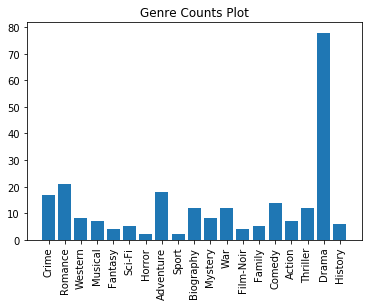

In [46]:
plt.bar(range(len(genre_counts)), genre_counts.values(), align='center')
plt.xticks(range(len(genre_counts)), list(genre_counts.keys()), rotation=90)
plt.title('Genre Counts Plot')
plt.show()

In [47]:
print(movies.Directors.nunique())
print(movies.Directors.value_counts())

print(movies.genres.value_counts())

58
Steven Spielberg         7
Billy Wilder             4
Alfred Hitchcock         4
Francis Ford Coppola     3
John Huston              3
John Ford                3
Frank Capra              3
George Stevens           3
Martin Scorsese          3
David Lean               3
Stanley Kubrick          3
William Wyler            3
George Cukor             2
Roman Polanski           2
Sidney Lumet             2
Charles Chaplin          2
Fred Zinnemann           2
William Friedkin         2
Victor Fleming           2
Frank Darabont           2
Elia Kazan               2
George Lucas             2
Michael Curtiz           2
Milos Forman             2
Carol Reed               1
Joel Coen                1
Barry Levinson           1
Franklin J. Schaffner    1
Gus Van Sant             1
Oliver Stone             1
Michael Cimino           1
Sergio Leone             1
Nicholas Ray             1
Vincente Minnelli        1
Lewis Milestone          1
John Schlesinger         1
Clint Eastwood           

In [48]:
# Add a binary column for each unique genre that is 1 if that genre fit the movie else 0
df_genre = pd.DataFrame(columns=unique_genres, index=range(movies.shape[0])).fillna(0)
for col in df_genre.columns:
    df_genre.loc[movies.genres.str.contains(str(col)), col] += 1
df_genre['sums'] = df_genre.sum(axis=1)

# combine df_genres with movies
fulldf = pd.concat([movies, df_genre],1)
print(fulldf.head())

                     titles  \
0             The Godfather   
1  The Shawshank Redemption   
2          Schindler's List   
3               Raging Bull   
4                Casablanca   

                                            synopsis             Directors  \
0  in late summer 1945, guests are gathered for t...  Francis Ford Coppola   
1  in 1947, andy dufresne tim robbins, a banker i...        Frank Darabont   
2  the relocation of polish jews from surrounding...      Steven Spielberg   
3  the film opens in 1964, where an older and fat...       Martin Scorsese   
4  in the early years of world war ii, december 1...        Michael Curtiz   

                      genres  Crime  Romance  Western  Musical  Fantasy  \
0               Crime, Drama      1        0        0        0        0   
1                      Drama      0        0        0        0        0   
2  Biography, Drama, History      0        0        0        0        0   
3    Biography, Drama, Sport      0        0

## Train a Word2Vec model
#### Word2vec provides word vectors that need to be tagged at the document level

In [49]:
model.wv.index2word[0]

"'s"

In [50]:
# Create a dataframe for modelling
def average_word_vectors(words, model, vocabulary, num_features):
    
    # initialize feature_vector and word count
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0
    
    # loops through all words for each synopsis and selects words that match vocabulary from word2vec
    for word in words:
        if word in vocabulary: 
            nwords += 1 # matched word counter
            
            # adds vectors for each matched word
            feature_vector = np.add(feature_vector, model[word])
            
    # Averages vector by number of words summed per synopsis    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector


def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features) for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=xtrain, model=model, num_features=feature_size)

#xtrain.apply(lambda x: averaged_word_vectorizer(corpus=x, model=model, num_features=feature_size))

X_train_w2v = pd.DataFrame(w2v_feature_array)

w2v_feature_array_test = averaged_word_vectorizer(corpus=xtest, model=model,
                                             num_features=feature_size)
X_test_w2v = pd.DataFrame(w2v_feature_array_test)

In [51]:
print(X_train_w2v.shape)

(75, 50)


In [52]:
# use target as romance for trial run
classifiers = [LogisticRegression(), SVC(), BernoulliNB(), RandomForestClassifier(random_state=42)]
label = ['Log Reg', 'SVC', 'BernoulliNB', 'RandomForest']

# grab correct targets for training
y = fulldf.loc[xtrain.index, 'Romance']

for label, clf in zip(label,classifiers):
    print('Number of goods = {}\nNumber of bads = {}'.format(np.sum(y), len(y)-np.sum(y)))
    clf.fit(X_train_w2v, y)
    print("Training cross validation: "+str(label))
    cv_score = cross_val_score(clf, X_train_w2v, y, cv=5)
    mse = np.sum(((cv_score-np.mean(cv_score))**2)/len(cv_score))
    print(cv_score)
    print('Average CV: %f' % np.mean(cv_score))
    print('Average error for cv: %f' %mse)
    print('')

Number of goods = 15
Number of bads = 60
Training cross validation: Log Reg
[0.8 0.8 0.8 0.8 0.8]
Average CV: 0.800000
Average error for cv: 0.000000

Number of goods = 15
Number of bads = 60
Training cross validation: SVC
[0.8 0.8 0.8 0.8 0.8]
Average CV: 0.800000
Average error for cv: 0.000000

Number of goods = 15
Number of bads = 60
Training cross validation: BernoulliNB
[0.8 0.8 0.8 0.8 0.8]
Average CV: 0.800000
Average error for cv: 0.000000

Number of goods = 15
Number of bads = 60
Training cross validation: RandomForest
[0.73333333 0.6        0.66666667 0.8        0.93333333]
Average CV: 0.746667
Average error for cv: 0.013156



After running the 4 classifiers above the SVC model performed the best with Romance, Drama, and comedy as tests.  Let's move forward with that model and create a function that will allow us to predict any of the 19 unique genres.

In [53]:
def movie_classifier(model, x, target, test=False, xt=None, cm=False):
    '''Fit and score model for various target variables'''
    label = re.sub("\([^()]*\)", "", str(model))
    
    
    
    # Create target variable
    y=fulldf.loc[xtrain.index, target]
    print('Number of goods = {}\nNumber of bads = {}'.format(np.sum(y), len(y)-np.sum(y)))
    
    # Fit model
    fit = model.fit(x, y)
    
    # Score model 
    print("Training cross validation: "+str(label))
    cv_score = cross_val_score(model, x, y, cv=5)
    print(cv_score)
    avg_cv = np.mean(cv_score)
    print('Average CV: %f' % avg_cv)
    print('')
    
    # Show confusion matrix
    if cm==True:
        train_pred = model.predict(x)
        conf_mat = confusion_matrix(y,train_pred)
        #acc_table = pd.crosstab(y, train_pred, margins=True)
        print('Training set confusion matrix:')
        print(conf_mat)
        print('')
        print('--'*20)
    
    # Score test
    if test == True:
        
        y_test=fulldf.loc[xtest.index, target]
        print('Number of goods = {}\nNumber of bads = {}'.format(np.sum(y_test), len(y_test)-np.sum(y_test)))
        
        test_scr = model.score(xt, y_test)
        print('Test score: %f' % test_scr)
        
        test_pred = model.predict(xt)
        conf_mat_test = confusion_matrix(y_test,test_pred)
        print('Testing set confusion matrix:')
        print(conf_mat_test)
        print('...'*40)
    return avg_cv, test_scr

In [54]:
movie_classifier(SVC(), X_train_w2v, 'Crime', test=True, xt=X_test_w2v, cm=True)

movie_classifier(BernoulliNB(), X_train_w2v, 'Crime', test=True, xt=X_test_w2v, cm=True)

Number of goods = 11
Number of bads = 64
Training cross validation: SVC
[0.8125     0.86666667 0.86666667 0.86666667 0.85714286]
Average CV: 0.853929

Training set confusion matrix:
[[64  0]
 [11  0]]

----------------------------------------
Number of goods = 6
Number of bads = 19
Test score: 0.760000
Testing set confusion matrix:
[[19  0]
 [ 6  0]]
........................................................................................................................
Number of goods = 11
Number of bads = 64
Training cross validation: BernoulliNB
[0.8125     0.86666667 0.86666667 0.86666667 0.85714286]
Average CV: 0.853929

Training set confusion matrix:
[[64  0]
 [11  0]]

----------------------------------------
Number of goods = 6
Number of bads = 19
Test score: 0.760000
Testing set confusion matrix:
[[19  0]
 [ 6  0]]
........................................................................................................................


(0.8539285714285715, 0.76)

Genre =  Crime
Number of goods = 11
Number of bads = 64
Training cross validation: SVC
[0.8125     0.86666667 0.86666667 0.86666667 0.85714286]
Average CV: 0.853929

Training set confusion matrix:
[[64  0]
 [11  0]]

----------------------------------------
Number of goods = 6
Number of bads = 19
Test score: 0.760000
Testing set confusion matrix:
[[19  0]
 [ 6  0]]
........................................................................................................................
Genre =  Romance
Number of goods = 15
Number of bads = 60
Training cross validation: SVC
[0.8 0.8 0.8 0.8 0.8]
Average CV: 0.800000

Training set confusion matrix:
[[60  0]
 [15  0]]

----------------------------------------
Number of goods = 6
Number of bads = 19
Test score: 0.760000
Testing set confusion matrix:
[[19  0]
 [ 6  0]]
........................................................................................................................
Genre =  Western
Number of goods = 6
Number of bads = 6

........................................................................................................................
Genre =  History
Number of goods = 3
Number of bads = 72
Training cross validation: SVC
[0.9375     0.9375     0.93333333 1.         1.        ]
Average CV: 0.961667

Training set confusion matrix:
[[72  0]
 [ 3  0]]

----------------------------------------
Number of goods = 3
Number of bads = 22
Test score: 0.880000
Testing set confusion matrix:
[[22  0]
 [ 3  0]]
........................................................................................................................


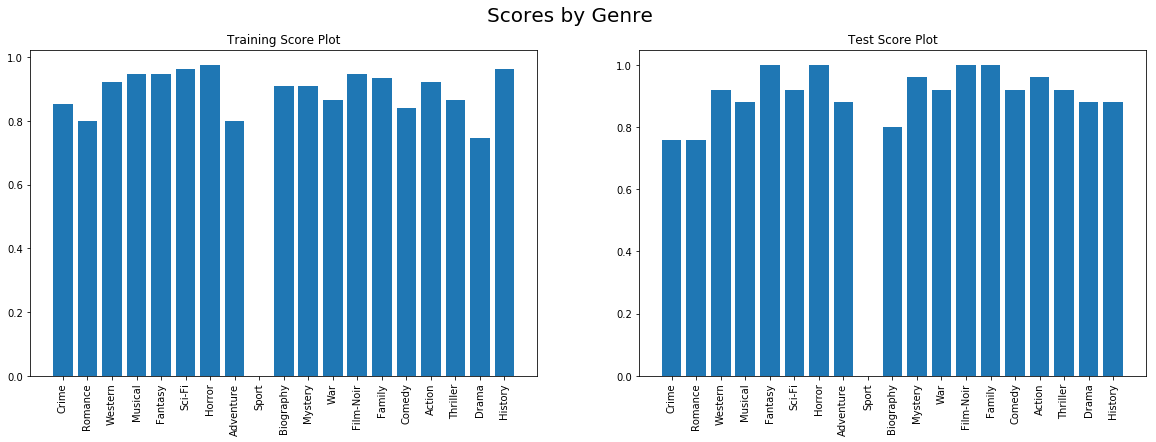

In [55]:
# Create plot to see which target scored the best
scores = []
test_scores = []
for x in unique_genres:
    try:
        print('Genre = ',x)
        scr, scr_test = movie_classifier(SVC(), X_train_w2v, x, test=True, xt=X_test_w2v, cm=True)
        scores.append(scr)
        test_scores.append(scr_test)
    except:
        print('Not enough class members\n')
        scores.append(0)
        test_scores.append(0)
        
#print(scores)
fig, ax = plt.subplots(1,2,figsize=(20,6))

ax[0].bar(range(len(scores)), scores, align='center')
ax[1].bar(range(len(scores)), test_scores, align='center')

ax[0].set_xticks(range(len(scores)))
ax[0].set_xticklabels(list(unique_genres), rotation=90)

ax[1].set_xticks(range(len(test_scores)))
ax[1].set_xticklabels(list(unique_genres), rotation=90)

ax[0].set_title('Training Score Plot')
ax[1].set_title('Test Score Plot')

plt.suptitle('Scores by Genre',fontsize=20)
plt.show()

Let's see if we can create a more balanced target variable by combining action, adventure, crime, war, and sport into one 'action' category.

In [56]:
action_ind = []
for x in ['Action', 'Adventure', 'Crime', 'War', 'Sport']:
    action_ind.append(fulldf.loc[fulldf[x]==1].index.values)

action_index = np.concatenate(action_ind, 0)

action_target = fulldf.loc[np.unique(action_index)]
action_target['action_target'] = 1
fulldf['action_target'] = action_target.action_target
fulldf.fillna(0,inplace=True)
print(fulldf.action_target.sum())

49.0


In [57]:
# Try models with new target - whether movie is action or not
for clf in classifiers:
    movie_classifier(clf, X_train_w2v, 'action_target', test=True, xt=X_test_w2v, cm=True)

Number of goods = 37.0
Number of bads = 38.0
Training cross validation: LogisticRegression
[0.5        0.5        0.53333333 0.5        0.5       ]
Average CV: 0.506667

Training set confusion matrix:
[[38  0]
 [37  0]]

----------------------------------------
Number of goods = 12.0
Number of bads = 13.0
Test score: 0.520000
Testing set confusion matrix:
[[13  0]
 [12  0]]
........................................................................................................................
Number of goods = 37.0
Number of bads = 38.0
Training cross validation: SVC
[0.5        0.5        0.66666667 0.5        0.5       ]
Average CV: 0.533333

Training set confusion matrix:
[[38  0]
 [37  0]]

----------------------------------------
Number of goods = 12.0
Number of bads = 13.0
Test score: 0.520000
Testing set confusion matrix:
[[13  0]
 [12  0]]
........................................................................................................................
Number of goods = 3

## Movie synopsis visualization

Create a function that shows the top words in a word cloud for each movie.

In [58]:
from PIL import Image
from wordcloud import WordCloud

In [59]:
def wordcloud(movie_ind):
    # Get the movie synopsis you want to create a word cloud for
    text = movies.synopsis[movie_ind]
    
    # Print the movie title
    print()
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stop_words).generate(text)

    # Display the generated image:
    fig = plt.figure(figsize=(15,15))
    fig.suptitle(movies.titles[movie_ind], fontsize=40, y=.75)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

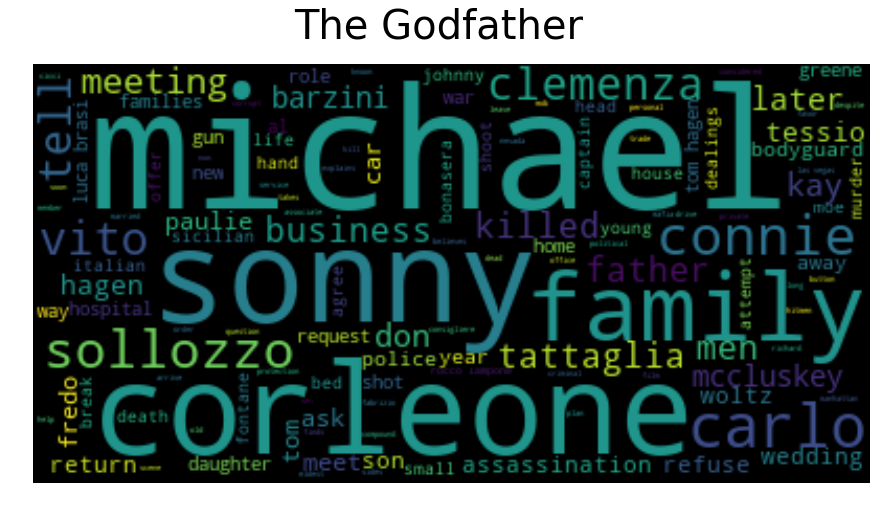

------------------------------------------------------------------------------------------



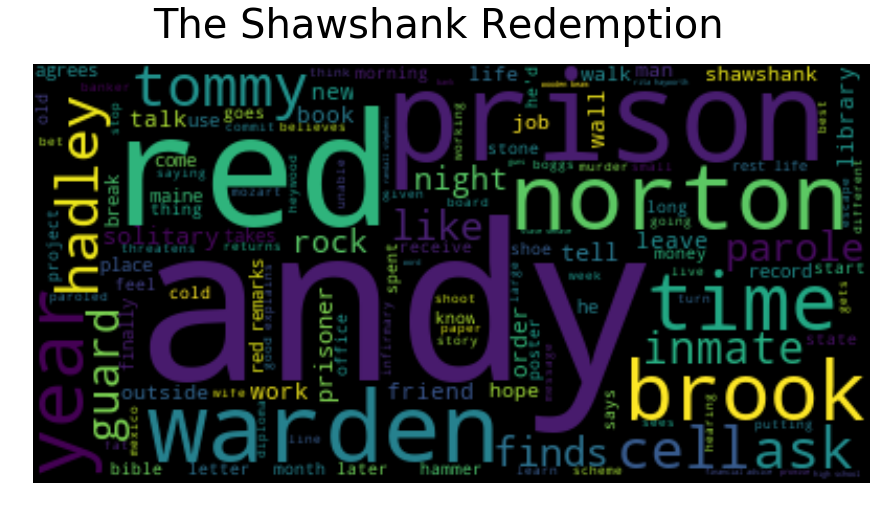

------------------------------------------------------------------------------------------



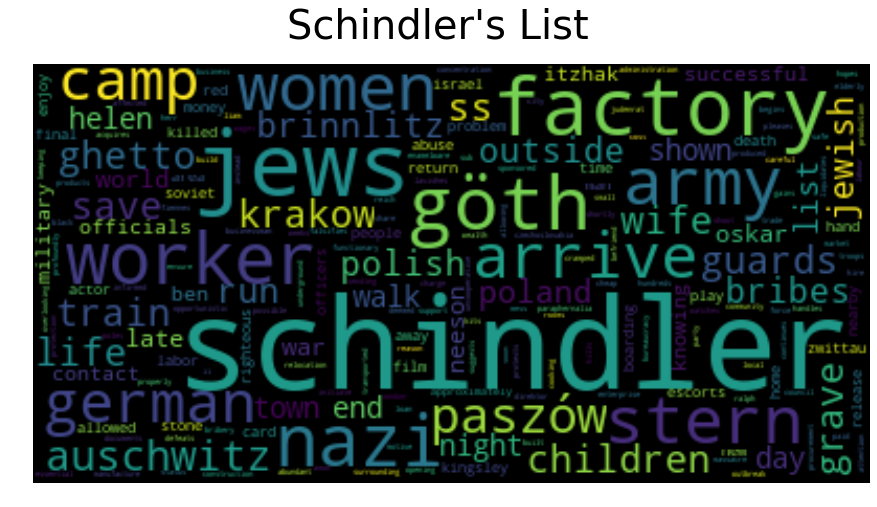

------------------------------------------------------------------------------------------



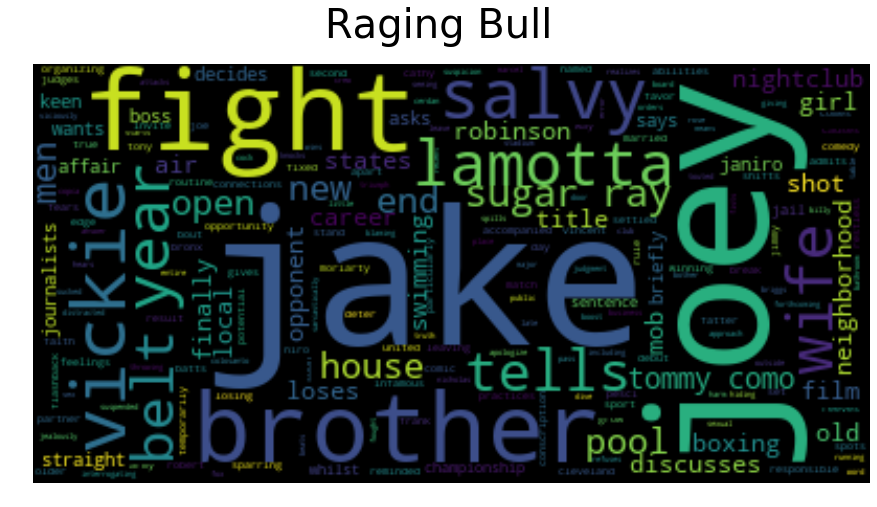

------------------------------------------------------------------------------------------



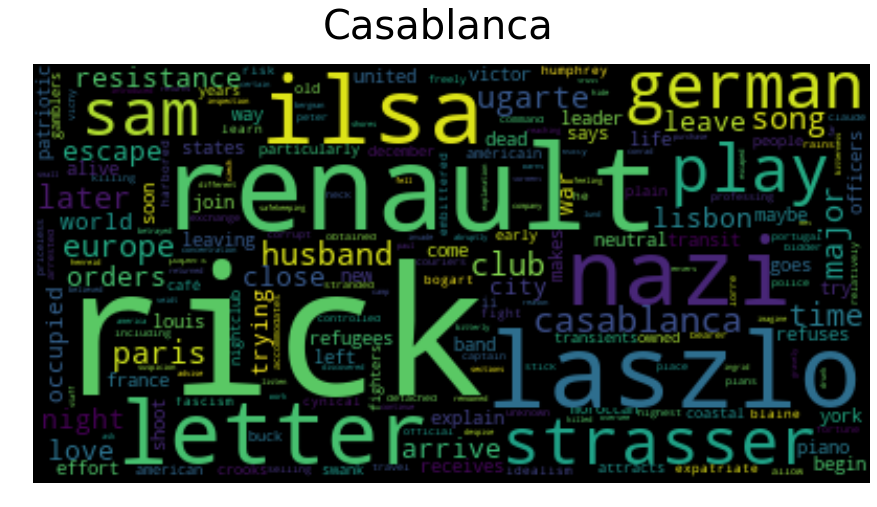

------------------------------------------------------------------------------------------



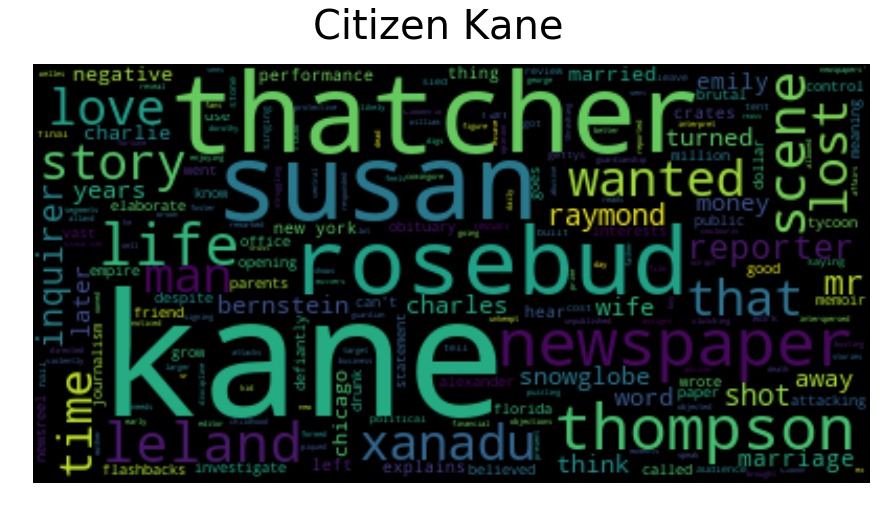

------------------------------------------------------------------------------------------



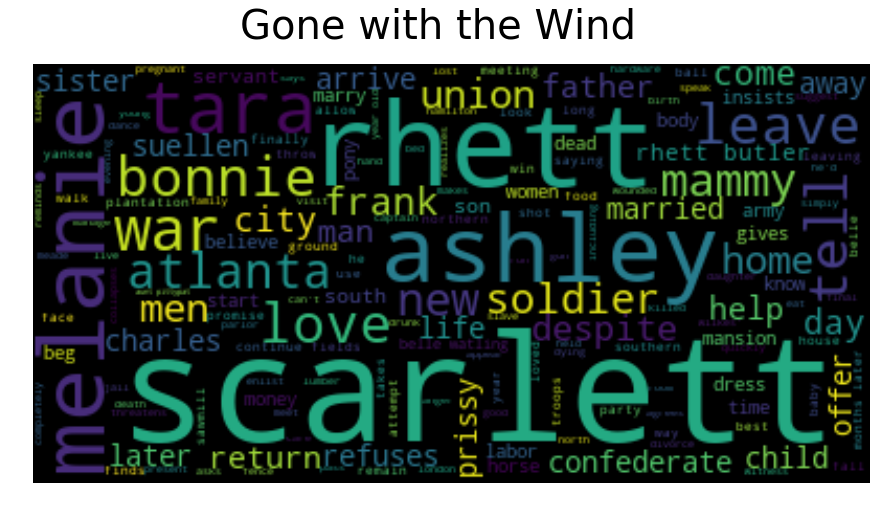

------------------------------------------------------------------------------------------



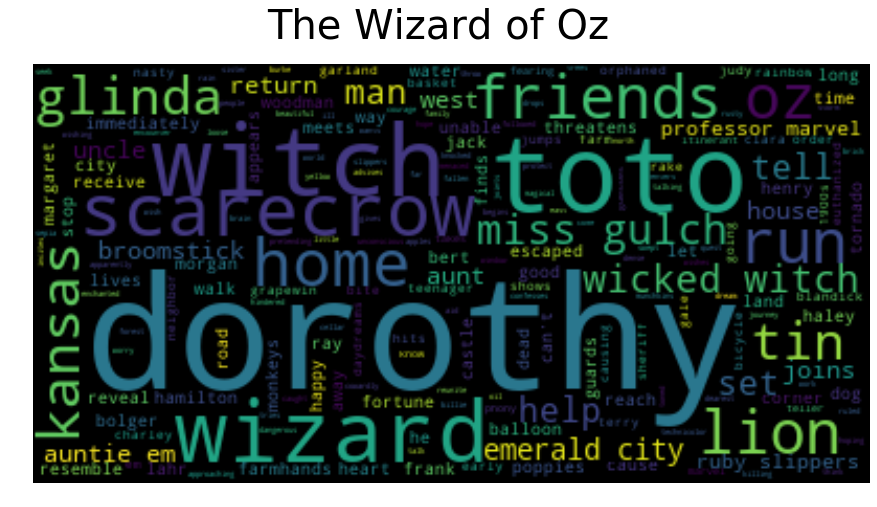

------------------------------------------------------------------------------------------



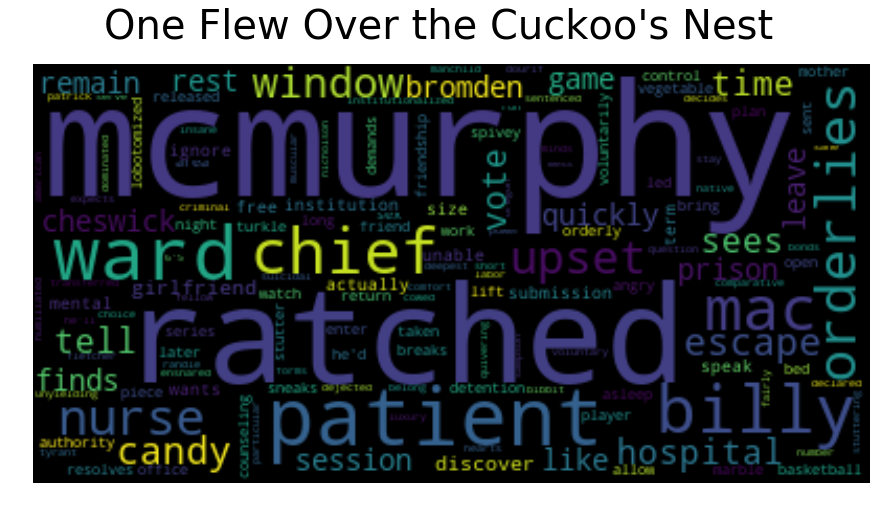

------------------------------------------------------------------------------------------



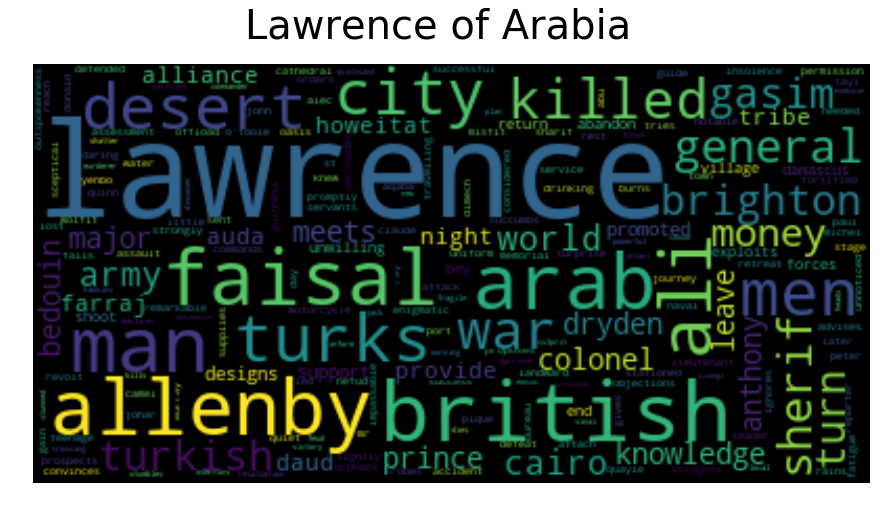

------------------------------------------------------------------------------------------


In [60]:
# Show a word cloud for the top 10 movies 
for i in range(10):
    wordcloud(i)
    print('---'*30)

In [61]:
def wordcloud_genre(genre):
    # Get the movie synopsis you want to create a word cloud for
    text = ' '.join(movies.synopsis[movies.genres.str.contains(genre)].tolist())
    
    # Create and generate a word cloud image:
    wordcloud = WordCloud(stopwords=stop_words).generate(text)

    # Display the generated image:
    fig = plt.figure(figsize=(15,15))
    fig.suptitle(genre, fontsize=40, y=.75)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

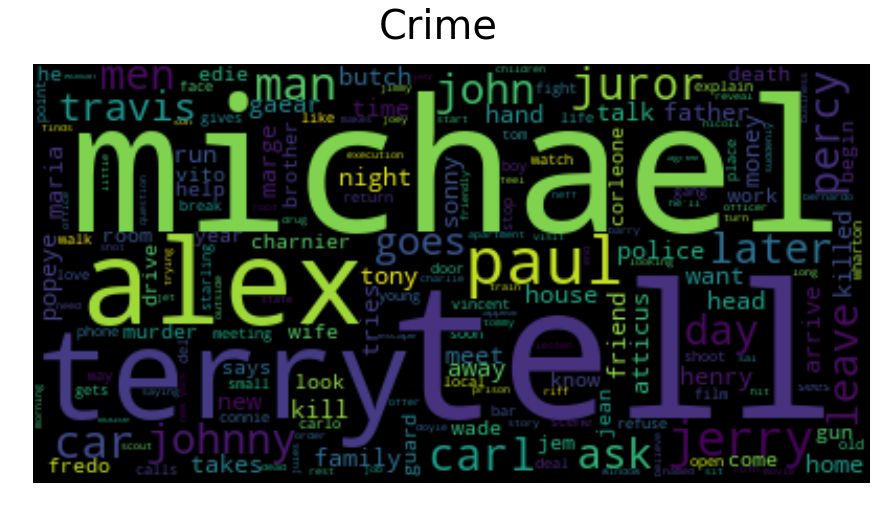

------------------------------------------------------------------------------------------


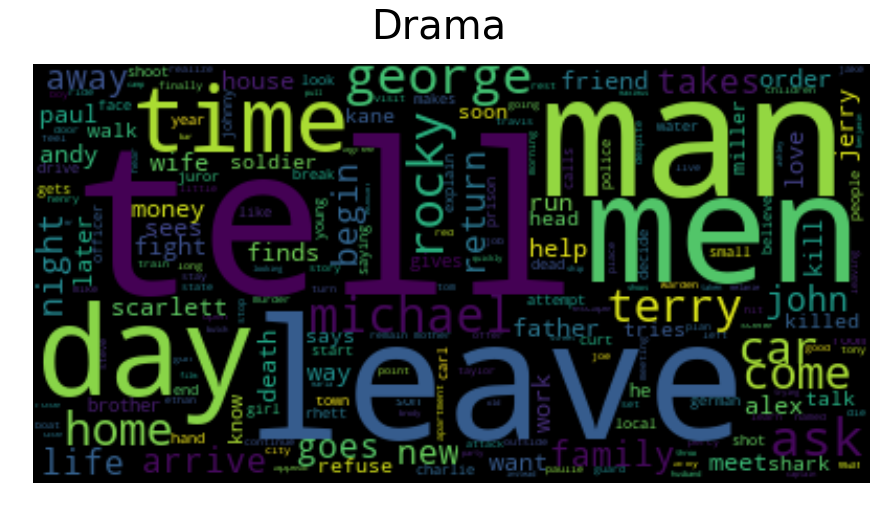

------------------------------------------------------------------------------------------


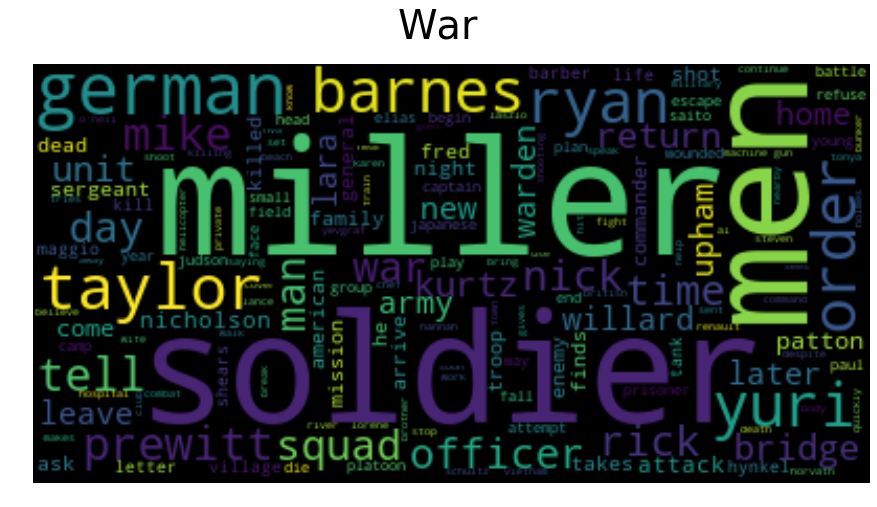

------------------------------------------------------------------------------------------


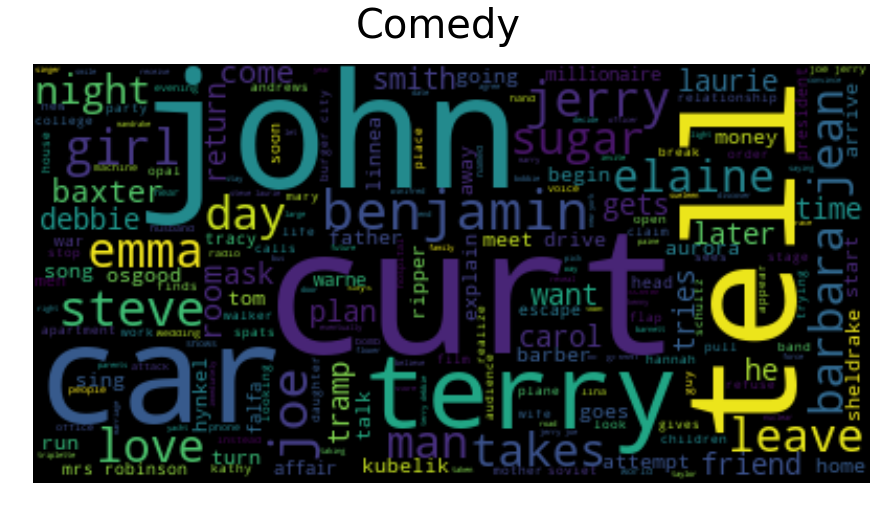

------------------------------------------------------------------------------------------


In [62]:
# Wordclouds for a few genres
for gen in ['Crime', 'Drama', 'War', 'Comedy']:
    wordcloud_genre(gen)
    print('---'*30)

## Wordcloud for top words in model

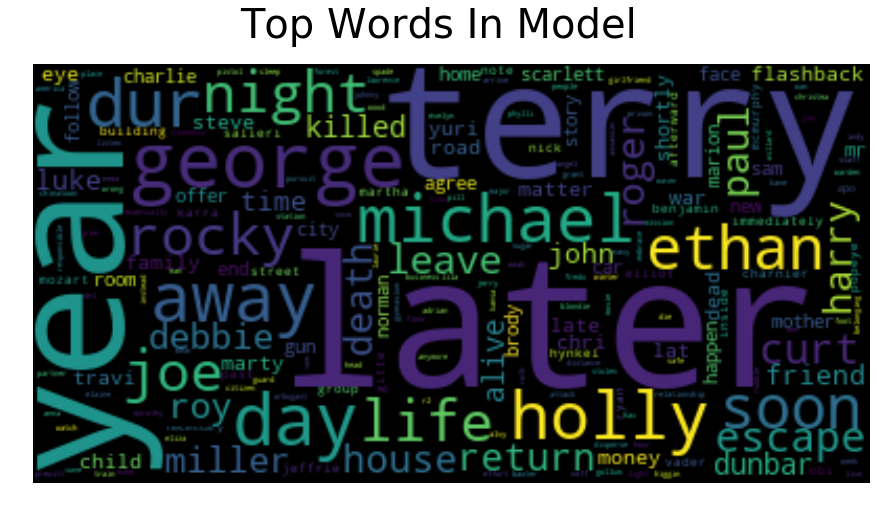

In [63]:
vocab = ' '.join(model.wv.index2word)
wordcloud_top_words = WordCloud(stopwords=stop_words).generate(vocab)

fig = plt.figure(figsize=(15,15))
plt.imshow(wordcloud_top_words, interpolation='bilinear')
fig.suptitle('Top Words In Model', fontsize=40, y=0.75, va='top')
plt.axis("off")
plt.show()

We have a model that predicts the genres of the top 100 movies based on movie synopses.  The model performs well interms of accuracy but when tested it seems to only predict one of the classes.  This is most likely due to the imbalance in the target variables.  When tested on a more balance target the accuracy was diminished.  The best test score was from the Random Forest at 56%.  This could be due to the similarity between the action and not action synopsis.  Since many of the movies have multiple genres listed and 78% of them are considered "drama", it may be that when we created a target that contained "action", "adventure", "crime", "war", and "sport" that other synopses are still very similar.

Still to add:
- Visualizations for clusters (Kmeans cluster=4) for training and testing
- RBM unsupervised learning
- Final report write up?

In [64]:
# try some parameter tuning
params = {'rbm__learning_rate': [1e-4, 1e-5],
          'rbm__batch_size':[200, 500, 1000],
          'rbm__n_iter':[10,20, 50],
          'logistic__C': [1.0]}
rbm = BernoulliRBM()
logistic = LogisticRegression()
classifier = Pipeline([("rbm", rbm), ("logistic", logistic)])
 
# perform a grid search on the learning rate, number of
# iterations, and number of components on the RBM and
# C for Logistic Regression

print("SEARCHING RBM + LOGISTIC REGRESSION")

# perform a grid search over the parameter
start = time.time()
gs = GridSearchCV(classifier, params, n_jobs = -1, verbose = 1)
gs.fit(X_train_w2v, fulldf.loc[xtrain.index, 'action_target'])
print(gs.best_params_)
end = time.time()
print('Search complete in: {:.5f}s'.format(end-start))

SEARCHING RBM + LOGISTIC REGRESSION
Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    5.5s finished


{'logistic__C': 1.0, 'rbm__batch_size': 500, 'rbm__learning_rate': 1e-05, 'rbm__n_iter': 20}
Search complete in: 5.72695s


In [65]:
gs.best_params_

{'logistic__C': 1.0,
 'rbm__batch_size': 500,
 'rbm__learning_rate': 1e-05,
 'rbm__n_iter': 20}

In [66]:
logistic.C = 1
rbm.batch_size = 500
rbm.learning_rate = 0.0001
rbm.n_iter=10

In [67]:
from sklearn.metrics import classification_report
classifier.fit(X_train_w2v, fulldf.loc[xtrain.index, 'action_target'])

print('Training score: ', classifier.score(X_train_w2v, fulldf.loc[xtrain.index, 'action_target']))
print('\nTest score: \n', classifier.score(X_test_w2v, fulldf.loc[xtest.index, 'action_target']))

Y_pred, train_pred = classifier.predict(X_test_w2v), classifier.predict(X_train_w2v)
Y_test = fulldf.loc[xtest.index, 'action_target']
Y_train = fulldf.loc[xtrain.index, 'action_target']

print('Confusion matrix for training set:')
print(confusion_matrix(Y_train, train_pred))
print('Confusion matrix for test:')
print(confusion_matrix(Y_test, Y_pred))
print("Logistic regression using RBM features:\n%s\n" % (classification_report(Y_test, Y_pred)))

Training score:  0.5066666666666667

Test score: 
 0.52
Confusion matrix for training set:
[[38  0]
 [37  0]]
Confusion matrix for test:
[[13  0]
 [12  0]]
Logistic regression using RBM features:
              precision    recall  f1-score   support

         0.0       0.52      1.00      0.68        13
         1.0       0.00      0.00      0.00        12

   micro avg       0.52      0.52      0.52        25
   macro avg       0.26      0.50      0.34        25
weighted avg       0.27      0.52      0.36        25




In [68]:
# fit with SVC now
classifier = Pipeline([('rbm', rbm),('svc',SVC())] )

classifier.fit(X_train_w2v, fulldf.loc[xtrain.index, 'action_target'])

print('Training score: ', classifier.score(X_train_w2v, fulldf.loc[xtrain.index, 'action_target']))
print('\nTest score: \n', classifier.score(X_test_w2v, fulldf.loc[xtest.index, 'action_target']))

Y_pred, train_pred = classifier.predict(X_test_w2v), classifier.predict(X_train_w2v)
Y_test = fulldf.loc[xtest.index, 'action_target']
Y_train = fulldf.loc[xtrain.index, 'action_target']

print('Confusion matrix for training set:')
print(confusion_matrix(Y_train, train_pred))
print('Confusion matrix for test:')
print(confusion_matrix(Y_test, Y_pred))
print("SVC using RBM features:\n%s\n" % (classification_report(Y_test, Y_pred)))

Training score:  0.5066666666666667

Test score: 
 0.52
Confusion matrix for training set:
[[38  0]
 [37  0]]
Confusion matrix for test:
[[13  0]
 [12  0]]
SVC using RBM features:
              precision    recall  f1-score   support

         0.0       0.52      1.00      0.68        13
         1.0       0.00      0.00      0.00        12

   micro avg       0.52      0.52      0.52        25
   macro avg       0.26      0.50      0.34        25
weighted avg       0.27      0.52      0.36        25




In [69]:
# fit with Random Forest now
classifier = Pipeline([('rbm', rbm),('rfc',RandomForestClassifier(random_state=42))] )

classifier.fit(X_train_w2v, fulldf.loc[xtrain.index, 'action_target'])

print('Training score: ', classifier.score(X_train_w2v, fulldf.loc[xtrain.index, 'action_target']))
print('\nTest score: \n', classifier.score(X_test_w2v, fulldf.loc[xtest.index, 'action_target']))

Y_pred, train_pred = classifier.predict(X_test_w2v), classifier.predict(X_train_w2v)
Y_test = fulldf.loc[xtest.index, 'action_target']
Y_train = fulldf.loc[xtrain.index, 'action_target']

print('Confusion matrix for training set:')
print(confusion_matrix(Y_train, train_pred))
print('Confusion matrix for test:')
print(confusion_matrix(Y_test, Y_pred))
print("Random Forest using RBM features:\n%s\n" % (classification_report(Y_test, Y_pred)))

Training score:  0.9333333333333333

Test score: 
 0.64
Confusion matrix for training set:
[[37  1]
 [ 4 33]]
Confusion matrix for test:
[[12  1]
 [ 8  4]]
Random Forest using RBM features:
              precision    recall  f1-score   support

         0.0       0.60      0.92      0.73        13
         1.0       0.80      0.33      0.47        12

   micro avg       0.64      0.64      0.64        25
   macro avg       0.70      0.63      0.60        25
weighted avg       0.70      0.64      0.60        25




- plot of doc vec vs genre
- word cloud for action target

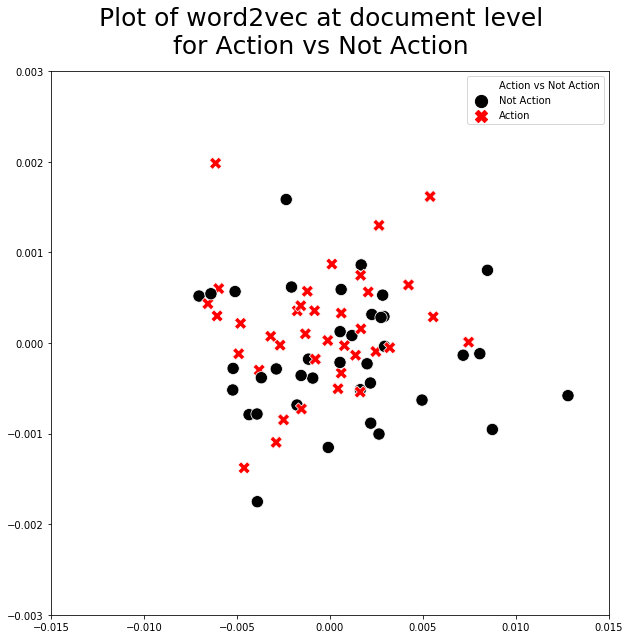

In [70]:
# plot the averaged word vectors for each synopsis vs genre

# need to reduce to 2 dimensions to plot
pca = PCA(n_components=2)

PCA_plot = pca.fit_transform(X_train_w2v)

xmin, xmax = -0.015, 0.015
ymin, ymax = -0.003, 0.003

#label = ['not action', 'action']
#from matplotlib.lines import Line2D
#legend_elements = [Line2D([0], [0], marker='o', color='w', label='Not Action', markerfacecolor='p', markersize=8),
                   #Line2D([0], [0], marker='o', color='w', label='Action', markerfacecolor='y', markersize=8)]

fig, ax = plt.subplots(figsize=(10,10))
g = sns.scatterplot(PCA_plot[:,0], PCA_plot[:,1], 
                hue=fulldf.action_target.loc[xtrain.index], 
                style=fulldf.action_target.loc[xtrain.index],
                size=fulldf.action_target.loc[xtrain.index],
                sizes=[150, 150], 
                palette=['k', 'r'])

plt.axis([xmin,xmax,ymin,ymax])

leg = g.axes.get_legend()

# replace labels
new_labels = ['Action vs Not Action', 'Not Action', 'Action']
for t, l in zip(leg.texts, new_labels):
    t.set_text(l)
    

plt.suptitle('Plot of word2vec at document level\nfor Action vs Not Action', fontsize=25,y=.97)
plt.show()

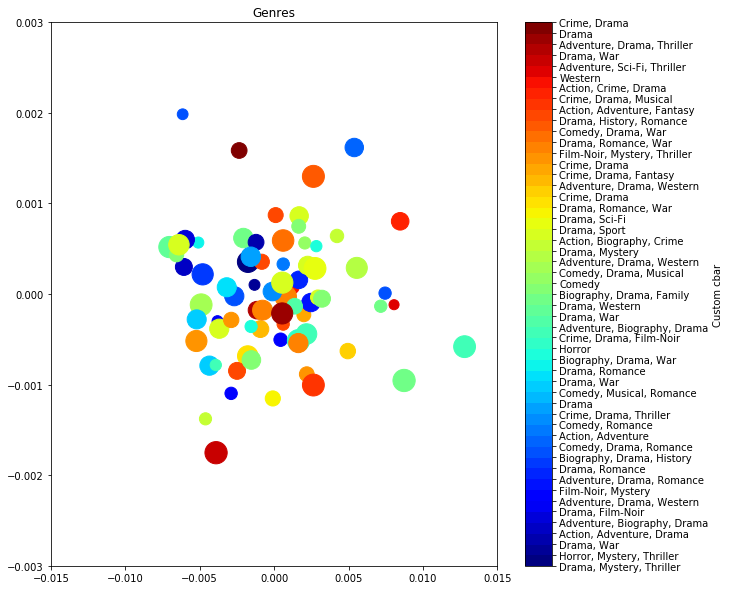

In [142]:
import matplotlib as mpl
# Number of labels
N = len(movies.genres.loc[xtrain.index].unique())

# Number unique genres for tagging
plot_genres = movies.genres.loc[xtrain.index].tolist()
plot_df = pd.DataFrame(index = np.unique(plot_genres)).reset_index()
plot_df['tag'] = range(len(np.unique(plot_genres)))
plot_df.columns=['genres', 'tag']
temp = pd.DataFrame(movies.genres.loc[xtrain.index].reset_index(drop=True).rename('genres'))
plot_df = temp.merge(plot_df, on='genres', how='left')

# setup the plot
fig, ax = plt.subplots(1,1, figsize=(10,10))

# define the data
x = PCA_plot[:,0]
y = PCA_plot[:,1]
tag = plot_df.tag # Tag each point with a corresponding label
labels = plot_df.genres

# define the colormap
cmap = plt.cm.jet

# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]

# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(0,N,N+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

xmin, xmax = -0.015, 0.015
ymin, ymax = -0.003, 0.003

# make the scatter
scat = ax.scatter(x,y, c=tag, s=np.random.randint(100,500,N),cmap=cmap, norm=norm)
plt.axis([xmin,xmax,ymin,ymax])

# create the colorbar
cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
cb.set_label('Custom cbar')
cb.ax.set_yticklabels(labels)
ax.set_title('Genres')
plt.show()

In [135]:
plot_genres = movies.genres.loc[xtrain.index].tolist()
plot_df = pd.DataFrame(index = np.unique(plot_genres)).reset_index()
plot_df['tag'] = range(len(np.unique(plot_genres)))
plot_df.columns=['genres', 'tag']
temp = pd.DataFrame(movies.genres.loc[xtrain.index].reset_index(drop=True).rename('genres'))
plot_df = temp.merge(plot_df, on='genres', how='left')


print(plot_df.sort_values(by='tag'))

                          genres  tag
12             Action, Adventure    0
3       Action, Adventure, Drama    1
42    Action, Adventure, Fantasy    2
30      Action, Biography, Crime    3
44          Action, Crime, Drama    4
53       Action, Drama, Thriller    5
22   Adventure, Biography, Drama    6
4    Adventure, Biography, Drama    6
8      Adventure, Drama, Romance    7
48    Adventure, Drama, Thriller    8
62         Adventure, Drama, War    9
6      Adventure, Drama, Western   10
35     Adventure, Drama, Western   10
28     Adventure, Drama, Western   10
65    Adventure, Family, Fantasy   11
54  Adventure, Mystery, Thriller   12
46   Adventure, Sci-Fi, Thriller   13
63            Adventure, Western   14
25      Biography, Drama, Family   15
10     Biography, Drama, History   16
69     Biography, Drama, History   16
19         Biography, Drama, War   17
26                        Comedy   18
61                 Comedy, Drama   19
64                 Comedy, Drama   19
27        Co